<a name="1"></a>
# **<h1 id="1" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Machine Learning Final Project: Question 2</h1>**

## Team members:
 - ## <span style="color:green">521H0489: Hồ Hữu An</span>.
 - ## <span style="color:green">521H0491: Trần Nhựt Anh</span>.
 - ## <span style="color:green">521H0290: Đỗ Minh Quân</span>.

<a name="2"></a>
# **<h1 id="2" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Import Libraries</h1>**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, StackingClassifier, VotingClassifier, BaggingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, LeakyReLU, BatchNormalization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_curve, auc
from keras import regularizers
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

<a name="3"></a>
# **<h1 id="3" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Exploratory Data Analysis and Wrangling</h1>**

## `Read data`

In [2]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

## `Get sample`

In [3]:
train_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24498,52,self-employed,married,tertiary,no,0,yes,no,cellular,17,nov,117,2,-1,0,unknown,no
30434,40,admin.,married,secondary,no,367,yes,no,telephone,5,feb,89,1,274,1,failure,no
17300,44,blue-collar,married,secondary,no,215,no,yes,cellular,28,jul,180,5,-1,0,unknown,no
37763,28,student,married,secondary,no,704,yes,yes,cellular,14,may,171,3,-1,0,unknown,no
33305,36,blue-collar,married,secondary,no,0,yes,yes,cellular,20,apr,240,1,326,1,success,no
38034,36,blue-collar,married,primary,no,994,yes,no,cellular,14,may,154,2,356,8,success,no
29094,45,technician,married,secondary,no,1818,no,no,cellular,2,feb,197,1,241,2,other,no
31426,33,management,single,tertiary,no,215,yes,no,cellular,27,mar,101,1,-1,0,unknown,no
30199,31,student,single,secondary,no,334,yes,no,cellular,5,feb,195,4,233,2,other,no
20742,33,technician,married,secondary,no,390,no,no,cellular,13,aug,460,2,-1,0,unknown,no


In [4]:
test_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3390,42,entrepreneur,married,primary,yes,66,yes,yes,cellular,6,feb,139,1,-1,0,unknown,no
2925,52,blue-collar,divorced,primary,no,-97,yes,yes,unknown,9,may,167,4,-1,0,unknown,no
593,31,technician,married,secondary,no,660,no,no,cellular,22,jun,115,1,-1,0,unknown,no
3041,32,admin.,single,secondary,no,92,yes,no,cellular,18,may,110,1,315,2,failure,no
640,57,admin.,divorced,unknown,no,887,no,no,unknown,20,jun,43,8,-1,0,unknown,no
632,52,blue-collar,married,secondary,no,289,yes,no,unknown,21,may,45,13,-1,0,unknown,no
1169,37,admin.,married,secondary,no,1193,no,no,cellular,12,may,396,2,-1,0,unknown,no
1573,50,blue-collar,married,secondary,no,372,yes,no,telephone,11,may,21,1,-1,0,unknown,no
3591,29,technician,married,secondary,no,0,yes,no,cellular,28,jul,83,6,-1,0,unknown,no
3637,60,retired,married,secondary,no,78,yes,no,unknown,12,may,113,3,-1,0,unknown,no


## `Get data informaion`

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Statistical analysis on data and Visualization

## `1. Overview statistics`

In [6]:
train_df.describe().round(2).style.format(precision=2).background_gradient(cmap="Blues")

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


## `2. Correlation Matrix`

Text(0.5, 1.0, 'Data correlations')

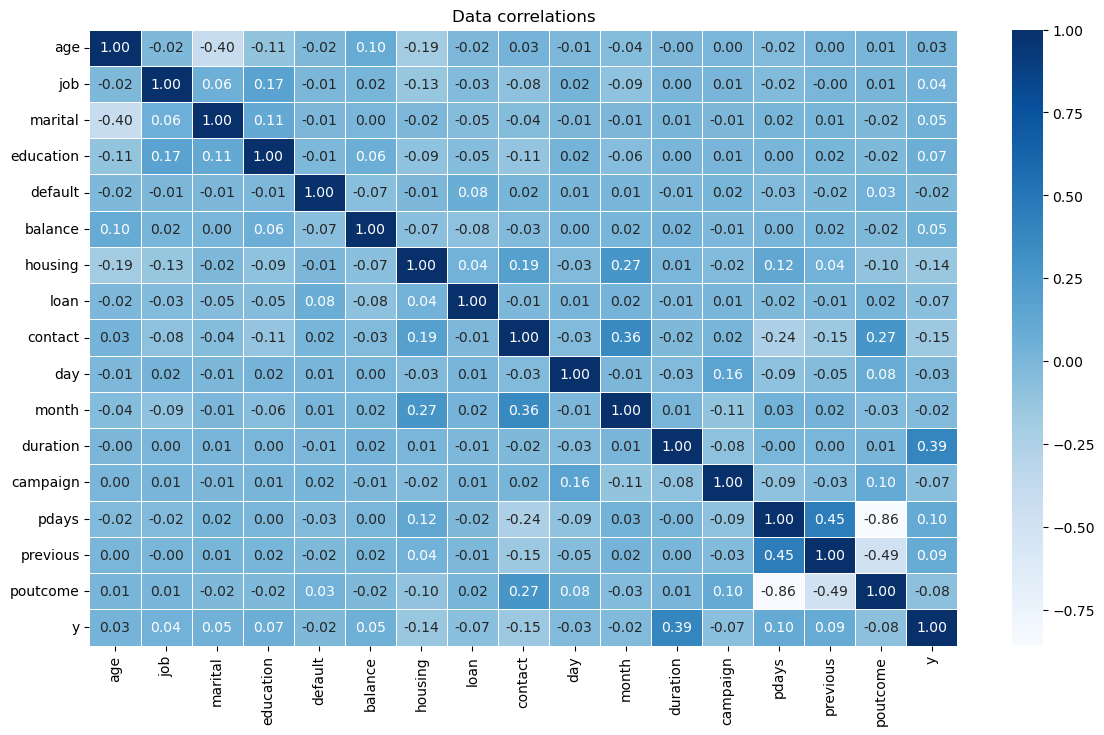

In [7]:
encoded_train = train_df.copy()

for column in encoded_train.columns:
    if encoded_train[column].dtype == 'object':
        label_encoder = LabelEncoder()
        encoded_train[column] = label_encoder.fit_transform(encoded_train[column])

correlation = encoded_train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation,annot=True,fmt='.2f',annot_kws={'size': 10},linewidths=0.5,cmap='Blues')
plt.title("Data correlations")

## `3. Chart Box`

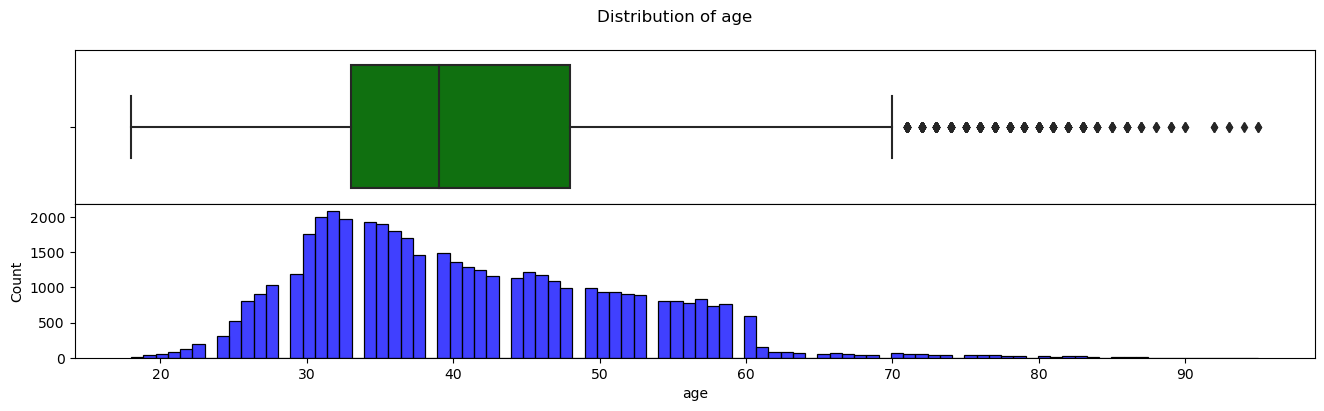

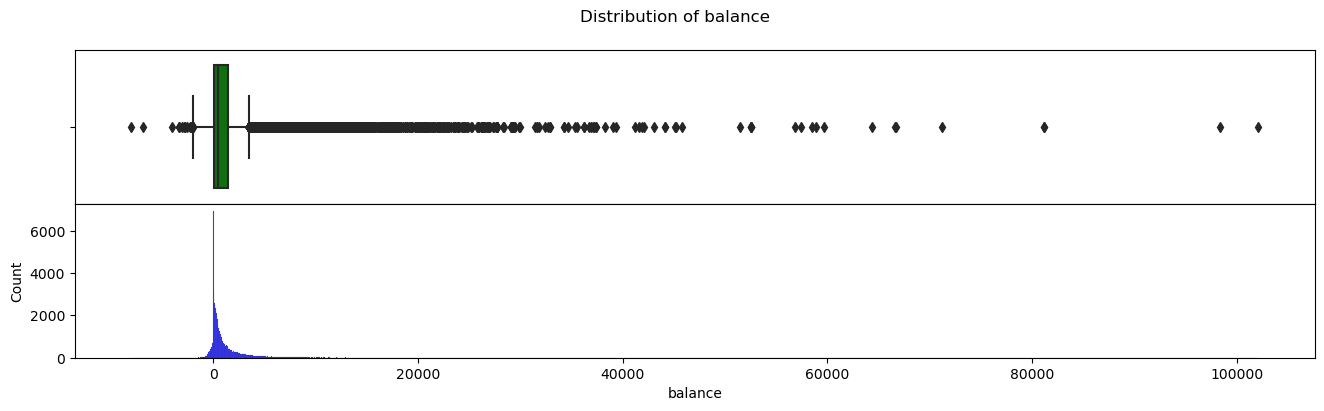

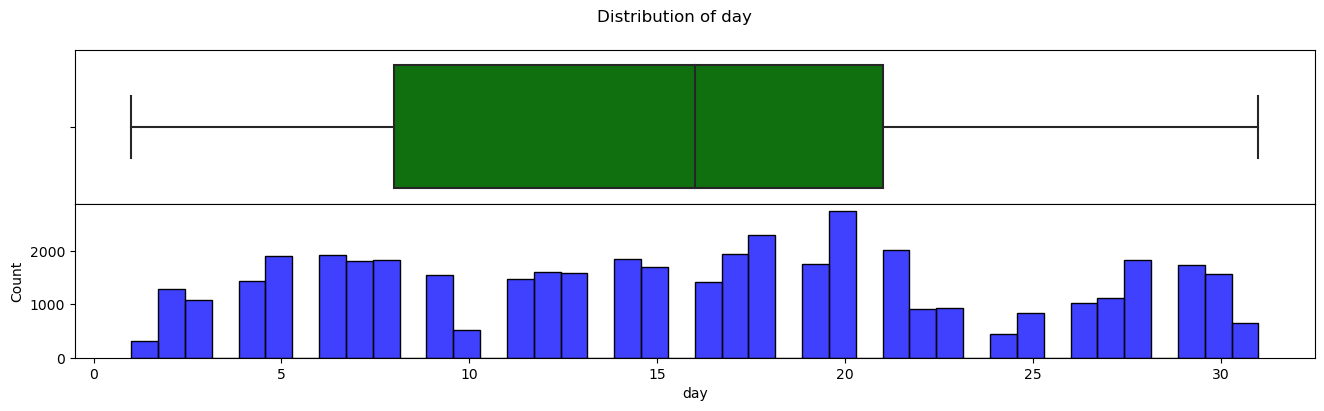

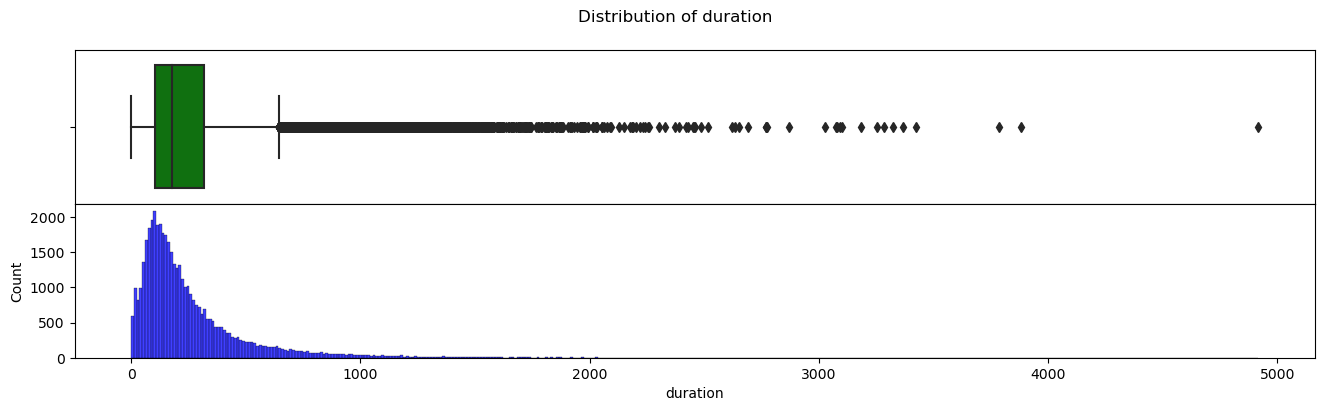

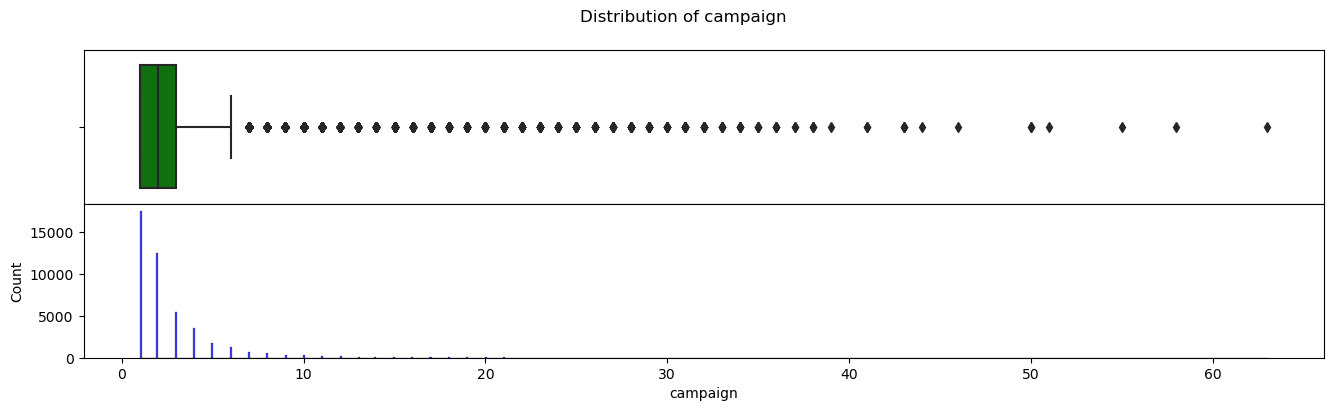

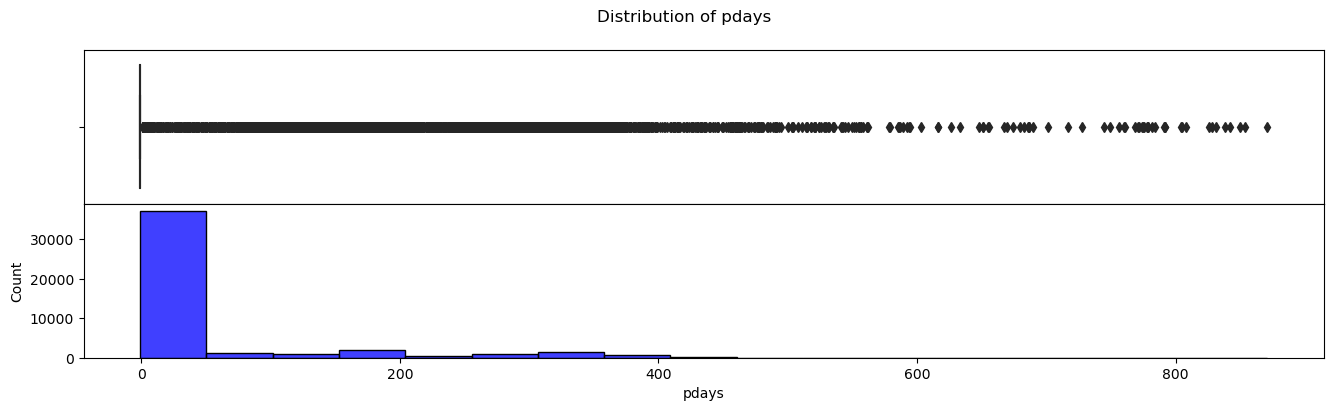

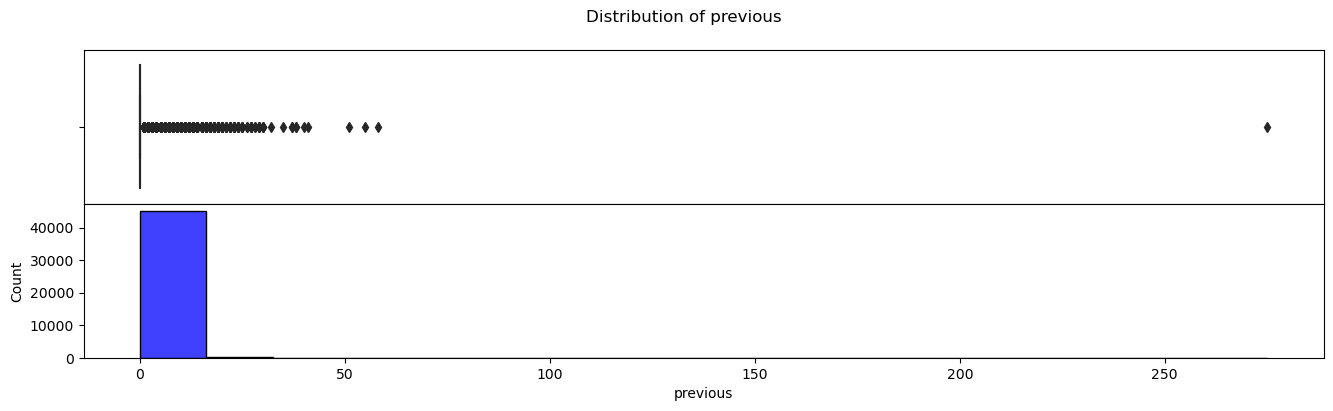

In [8]:
numerical = train_df.select_dtypes(exclude='object')
n = len(numerical)

for col in numerical:
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
    plt.suptitle(f"Distribution of {col}")
    sns.boxplot(data=train_df, x=col, ax=ax1, color="Green")
    ax1.set_xlabel(None)
    ax1.get_xaxis().set_ticks([])
    sns.histplot(data=train_df, x=col, ax=ax2, color="Blue")
    plt.subplots_adjust(hspace=0)
    print("\n")
    plt.show()

## `4. Target class imbalance`

Count of each Status:
no     39922
yes     5289
Name: y, dtype: int64



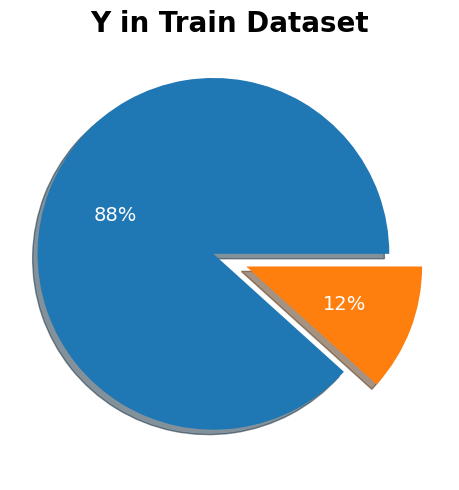

In [9]:
status_counts = train_df['y'].value_counts()
print("Count of each Status:")
print(status_counts)
print()

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.pie(
    train_df['y'].value_counts(), 
    shadow=True, 
    explode=[.1 for i in range(train_df['y'].nunique())],
    autopct='%1.f%%',
    textprops={'size': 14, 'color': 'white'}
)
ax.set_title('Y in Train Dataset', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

<a name="4"></a>
# **<h1 id="4" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Data preprocessing</h1>**

## `1 Data encoding`

In [3]:
train_df = pd.get_dummies(train_df, columns=['education'])

In [4]:
test_df = pd.get_dummies(test_df, columns=['education'])

In [5]:
le = LabelEncoder()
train_df = train_df.apply(le.fit_transform)
train_df

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,education_primary,education_secondary,education_tertiary,education_unknown
0,40,4,1,0,3036,1,0,2,4,8,261,0,0,0,3,0,0,0,1,0
1,26,9,2,0,945,1,0,2,4,8,151,0,0,0,3,0,0,1,0,0
2,15,2,1,0,918,1,1,2,4,8,76,0,0,0,3,0,0,1,0,0
3,29,1,1,0,2420,1,0,2,4,8,92,0,0,0,3,0,0,0,0,1
4,15,11,2,0,917,0,0,2,4,8,198,0,0,0,3,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,0,1741,0,0,0,16,9,975,2,0,0,3,1,0,0,1,0
45207,53,5,0,0,2639,0,0,0,16,9,456,1,0,0,3,1,1,0,0,0
45208,54,5,1,0,5455,0,0,0,16,9,1116,4,181,3,2,1,0,1,0,0
45209,39,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0,0,1,0,0


In [6]:
test_df = test_df.apply(le.fit_transform)
test_df

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,education_primary,education_secondary,education_tertiary,education_unknown
0,11,10,1,0,1475,0,0,0,18,10,75,0,0,0,3,0,1,0,0,0
1,14,7,1,0,2030,1,1,0,10,8,216,0,228,4,0,0,0,1,0,0
2,16,4,2,0,1303,1,0,0,15,0,181,0,219,1,0,0,0,0,1,0
3,11,4,1,0,1352,1,1,2,2,6,195,3,0,0,3,0,0,0,1,0
4,40,1,1,0,274,1,0,2,4,8,222,0,0,0,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,7,1,0,119,1,0,0,29,5,325,4,0,0,3,0,0,1,0,0
4517,38,6,1,1,0,1,1,2,8,8,149,0,0,0,3,0,0,0,1,0
4518,38,9,1,0,558,0,0,0,18,1,147,10,0,0,3,0,0,1,0,0
4519,9,1,1,0,1187,0,0,0,5,3,125,3,140,3,1,0,0,1,0,0


## `2 Data Normalization`

In [7]:
columns_to_scale = ['age','balance','duration','campaign','pdays','previous']
scaler = MinMaxScaler()

# FOR TRAIN DATA
scaled_values = scaler.fit_transform(train_df[columns_to_scale])
train_df[columns_to_scale] = scaled_values

aggregated_train = train_df[columns_to_scale].agg(['mean', 'min', 'max', 'median', 'std']).style.background_gradient(cmap='Greens')
aggregated_train

,age,balance,duration,campaign,pdays,previous
mean,0.301790,0.273937,0.162429,0.037497,0.071961,0.014334
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
median,0.276316,0.190317,0.114504,0.021277,0.000000,0.000000
std,0.139711,0.204204,0.152456,0.065445,0.173687,0.046942


In [8]:
# FOR TEST DATA
scaled_values = scaler.fit_transform(test_df[columns_to_scale])
test_df[columns_to_scale] = scaled_values

aggregated_train = test_df[columns_to_scale].agg(['mean', 'min', 'max', 'median', 'std']).style.background_gradient(cmap='Greens')
aggregated_train

,age,balance,duration,campaign,pdays,previous
mean,0.335880,0.380399,0.276114,0.057524,0.087177,0.023475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
median,0.303030,0.296344,0.207094,0.032258,0.000000,0.000000
std,0.160124,0.269105,0.224668,0.096683,0.219324,0.072225


## `3 Data Splitting`

In [9]:
X_train = train_df.drop(columns=['y'], axis =1)
y_train = train_df['y']

X_test = test_df.drop(columns=['y'], axis =1)
y_test = test_df['y']

In [10]:
X_train

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,education_primary,education_secondary,education_tertiary,education_unknown
0,0.526316,4,1,0,0.423608,1,0,2,4,8,0.166031,0.000000,0.000000,0.000,3,0,0,1,0
1,0.342105,9,2,0,0.131854,1,0,2,4,8,0.096056,0.000000,0.000000,0.000,3,0,1,0,0
2,0.197368,2,1,0,0.128087,1,1,2,4,8,0.048346,0.000000,0.000000,0.000,3,0,1,0,0
3,0.381579,1,1,0,0.337659,1,0,2,4,8,0.058524,0.000000,0.000000,0.000,3,0,0,0,1
4,0.197368,11,2,0,0.127948,0,0,2,4,8,0.125954,0.000000,0.000000,0.000,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.434211,9,1,0,0.242919,0,0,0,16,9,0.620229,0.042553,0.000000,0.000,3,0,0,1,0
45207,0.697368,5,0,0,0.368215,0,0,0,16,9,0.290076,0.021277,0.000000,0.000,3,1,0,0,0
45208,0.710526,5,1,0,0.761127,0,0,0,16,9,0.709924,0.085106,0.324373,0.075,2,0,1,0,0
45209,0.513158,1,1,0,0.221013,0,0,1,16,9,0.323155,0.063830,0.000000,0.000,3,0,1,0,0


In [11]:
X_test

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,education_primary,education_secondary,education_tertiary,education_unknown
0,0.166667,10,1,0,0.627126,0,0,0,18,10,0.085812,0.000000,0.000000,0.000000,3,1,0,0,0
1,0.212121,7,1,0,0.863095,1,1,0,10,8,0.247140,0.000000,0.783505,0.173913,0,0,1,0,0
2,0.242424,4,2,0,0.553997,1,0,0,15,0,0.207094,0.000000,0.752577,0.043478,0,0,0,1,0
3,0.166667,4,1,0,0.574830,1,1,2,2,6,0.223112,0.096774,0.000000,0.000000,3,0,0,1,0
4,0.606061,1,1,0,0.116497,1,0,2,4,8,0.254005,0.000000,0.000000,0.000000,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.212121,7,1,0,0.050595,1,0,0,29,5,0.371854,0.129032,0.000000,0.000000,3,0,1,0,0
4517,0.575758,6,1,1,0.000000,1,1,2,8,8,0.170481,0.000000,0.000000,0.000000,3,0,0,1,0
4518,0.575758,9,1,0,0.237245,0,0,0,18,1,0.168192,0.322581,0.000000,0.000000,3,0,1,0,0
4519,0.136364,1,1,0,0.504677,0,0,0,5,3,0.143021,0.096774,0.481100,0.130435,1,0,1,0,0


<a name="4"></a>
# **<h1 id="4" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Basic Model</h1>**

In [12]:
def make_confusion_matrix(cm):
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    axe = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=True, annot_kws={'fontsize': 12})
    axe.set(xlabel="Predict", ylabel="Actual")

## `Logistic Regression`

In [13]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      4000
           1       0.42      0.61      0.50       521

    accuracy                           0.86      4521
   macro avg       0.68      0.75      0.71      4521
weighted avg       0.89      0.86      0.87      4521



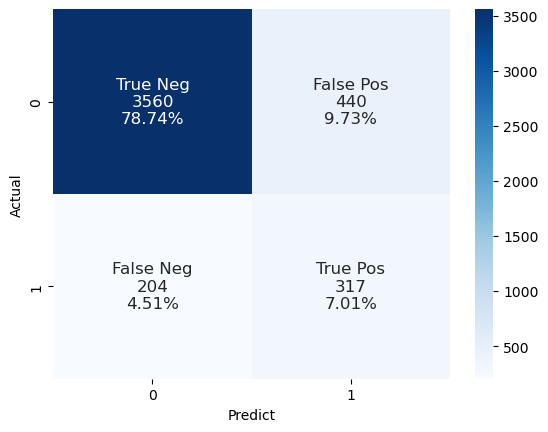

In [15]:
y_LR_pred = LR.predict(X_test)

classification_report_LR = classification_report(y_test, y_LR_pred)
print(classification_report_LR)

confusion_matrix_LR = confusion_matrix(y_test, y_LR_pred)
make_confusion_matrix (confusion_matrix_LR)

## `KNN`

In [71]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      4000
           1       0.69      0.26      0.38       521

    accuracy                           0.90      4521
   macro avg       0.80      0.62      0.66      4521
weighted avg       0.89      0.90      0.88      4521



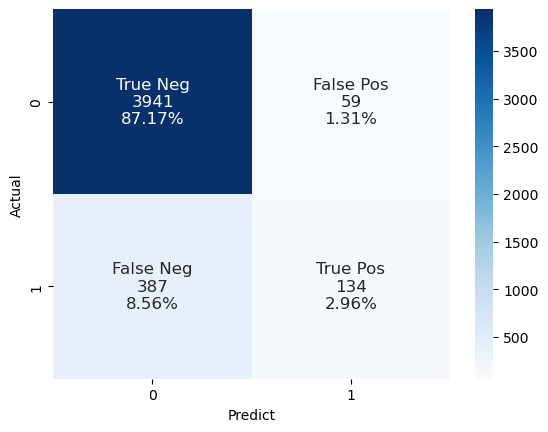

In [72]:
y_KNN_pred = KNN.predict(X_test.values)

classification_report_KNN = classification_report(y_test, y_KNN_pred)
print(classification_report_KNN)

confusion_matrix_KNN = confusion_matrix(y_test, y_KNN_pred)
make_confusion_matrix (confusion_matrix_KNN)

## `Decision Trree`

In [73]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      4000
           1       0.30      0.64      0.41       521

    accuracy                           0.79      4521
   macro avg       0.62      0.72      0.64      4521
weighted avg       0.87      0.79      0.82      4521



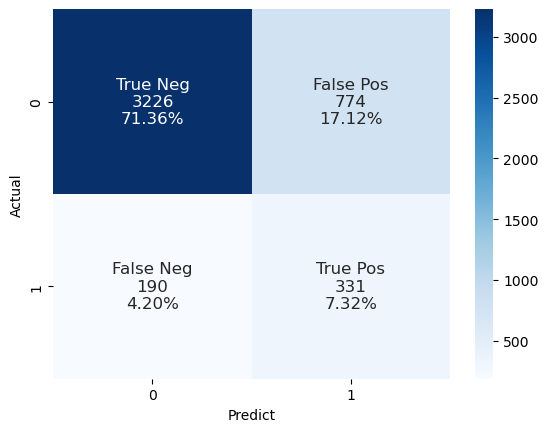

In [74]:
y_DT_pred = DT.predict(X_test.values)

classification_report_DT = classification_report(y_test, y_DT_pred)
print(classification_report_DT)

confusion_matrix_DT = confusion_matrix(y_test, y_DT_pred)
make_confusion_matrix (confusion_matrix_DT)

## `Naive Bayes`

In [75]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      4000
           1       0.30      0.64      0.41       521

    accuracy                           0.79      4521
   macro avg       0.62      0.72      0.64      4521
weighted avg       0.87      0.79      0.82      4521



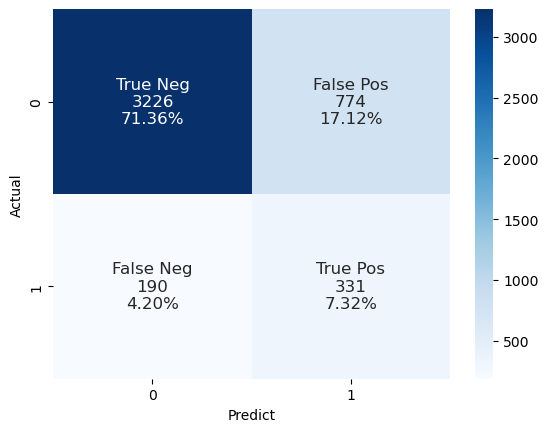

In [76]:
y_GNB_pred = DT.predict(X_test.values)

classification_report_GNB = classification_report(y_test, y_GNB_pred)
print(classification_report_GNB)

confusion_matrix_GNB = confusion_matrix(y_test, y_GNB_pred)
make_confusion_matrix (confusion_matrix_GNB)

## `SVM`

In [77]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



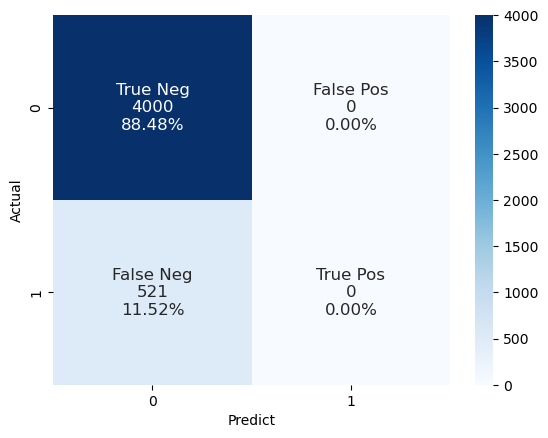

In [78]:
y_svm_pred=svm.predict(X_test)

classification_report_svm = classification_report(y_test, y_svm_pred)
print(classification_report_svm)

confusion_matrix_svm = confusion_matrix(y_test, y_svm_pred)
make_confusion_matrix (confusion_matrix_svm)

## `Perceptron`

In [79]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

Perceptron()

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      4000
           1       0.43      0.38      0.40       521

    accuracy                           0.87      4521
   macro avg       0.67      0.66      0.66      4521
weighted avg       0.86      0.87      0.87      4521



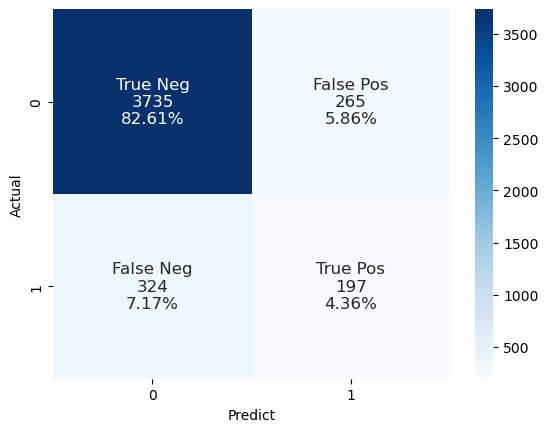

In [80]:
y_perceptron_pred=perceptron.predict(X_test)

classification_report_perceptron = classification_report(y_test, y_perceptron_pred)
print(classification_report_perceptron)

confusion_matrix_perceptron = confusion_matrix(y_test, y_perceptron_pred)
make_confusion_matrix (confusion_matrix_perceptron)

<a name="5"></a>
# **<h1 id="5" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Ensemble Learing</h1>**

## `Bagging`

In [81]:
bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), random_state=42)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4000
           1       0.75      0.35      0.47       521

    accuracy                           0.91      4521
   macro avg       0.83      0.67      0.71      4521
weighted avg       0.90      0.91      0.90      4521



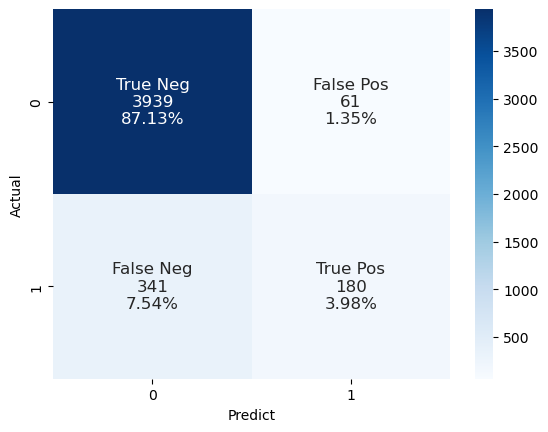

In [82]:
y_bagging_pred = bagging.predict(X_test)

classification_report_bagging = classification_report(y_test, y_bagging_pred)
print(classification_report_bagging)

confusion_matrix_bagging = confusion_matrix(y_test, y_bagging_pred)
make_confusion_matrix (confusion_matrix_bagging)

## `Voting`

In [83]:
voting = VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),('ada', AdaBoostClassifier()), ('rf', RandomForestClassifier()), ('logreg', LogisticRegression())], voting='hard')
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('ada', AdaBoostClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('logreg', LogisticRegression())])

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4000
           1       0.53      0.60      0.56       521

    accuracy                           0.89      4521
   macro avg       0.74      0.77      0.75      4521
weighted avg       0.90      0.89      0.90      4521



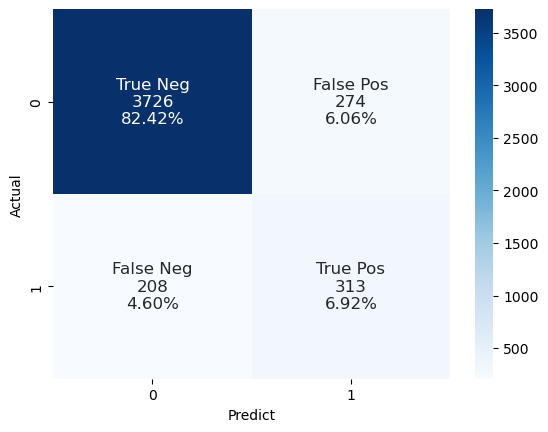

In [84]:
y_voting_pred = voting.predict(X_test)

classification_report_voting = classification_report(y_test, y_voting_pred)
print(classification_report_voting)

confusion_matrix_voting = confusion_matrix(y_test, y_voting_pred)
make_confusion_matrix (confusion_matrix_voting)

## `Stacking`

In [85]:
stacking = StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),('ada', AdaBoostClassifier()), ('rf', RandomForestClassifier())], final_estimator=LogisticRegression())
stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('ada', AdaBoostClassifier()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



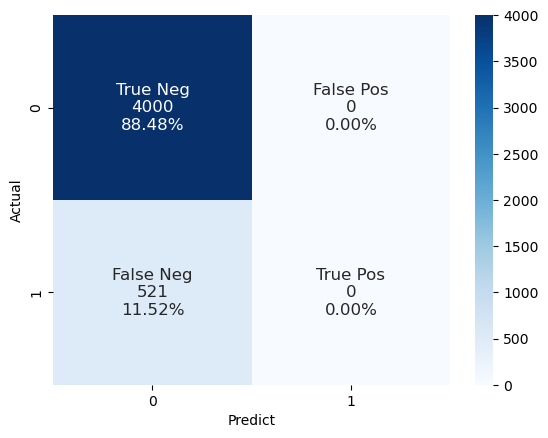

In [86]:
y_stacking_pred = stacking.predict(X_test)

classification_report_stacking = classification_report(y_test, y_stacking_pred)
print(classification_report_stacking)

confusion_matrix_stacking = confusion_matrix(y_test, y_stacking_pred)
make_confusion_matrix (confusion_matrix_stacking)

## `Random Forest`

In [87]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      4000
           1       0.49      0.73      0.59       521

    accuracy                           0.88      4521
   macro avg       0.73      0.82      0.76      4521
weighted avg       0.91      0.88      0.89      4521



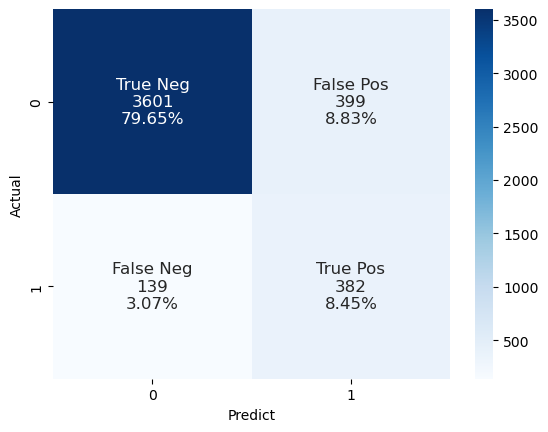

In [88]:
y_RF_pred = RF.predict(X_test)

classification_report_RF = classification_report(y_test, y_RF_pred)
print(classification_report_RF)

confusion_matrix_RF = confusion_matrix(y_test, y_RF_pred)
make_confusion_matrix (confusion_matrix_RF)

## `Gradient Boosting`

In [89]:
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)

GradientBoostingClassifier()

Accuracy of Gradient Boosting 0.8701614687016147
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      4000
           1       0.46      0.74      0.57       521

    accuracy                           0.87      4521
   macro avg       0.71      0.81      0.75      4521
weighted avg       0.90      0.87      0.88      4521



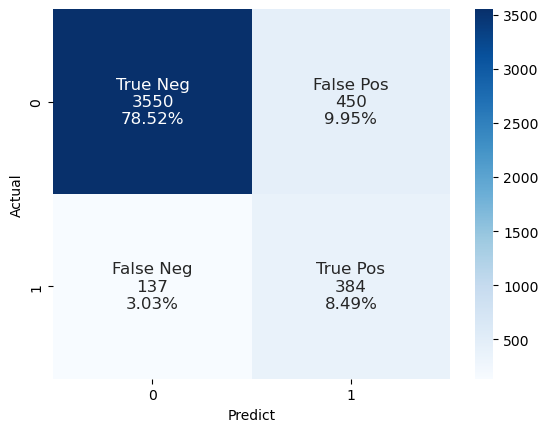

In [90]:
y_GB_pred = GB.predict(X_test)
accuracy_GB_before_improve = accuracy_score(y_test, y_GB_pred)
print("Accuracy of Gradient Boosting",accuracy_GB_before_improve)
print(classification_report(y_test, y_GB_pred))
make_confusion_matrix (confusion_matrix(y_test, y_GB_pred))

## `Adaboost`

In [91]:
ADA = AdaBoostClassifier(n_estimators=50)
ADA.fit(X_train, y_train)

AdaBoostClassifier()

Accuracy of Adaboost 0.8604291086042911
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      4000
           1       0.42      0.57      0.49       521

    accuracy                           0.86      4521
   macro avg       0.68      0.74      0.70      4521
weighted avg       0.88      0.86      0.87      4521



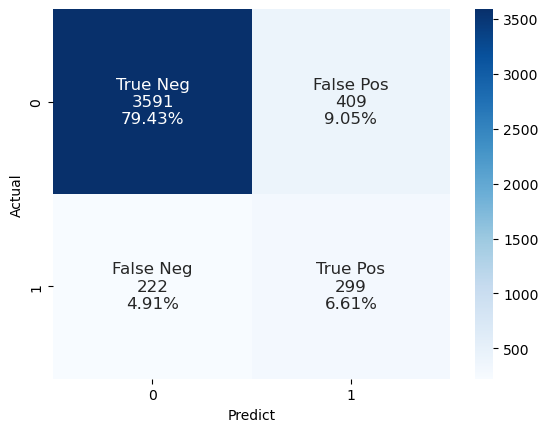

In [92]:
y_ADA_pred = ADA.predict(X_test)
accuracy_ADA_before_improve = accuracy_score(y_test, y_ADA_pred)
print("Accuracy of Adaboost",accuracy_ADA_before_improve)
print(classification_report(y_test, y_ADA_pred))
make_confusion_matrix (confusion_matrix(y_test, y_ADA_pred))

## `XGBoost`

In [93]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      4000
           1       0.44      0.73      0.55       521

    accuracy                           0.86      4521
   macro avg       0.70      0.80      0.74      4521
weighted avg       0.90      0.86      0.88      4521



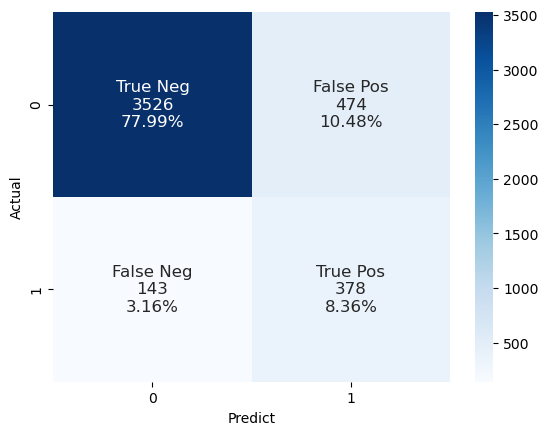

In [94]:
y_xgb_pred = xgb.predict(X_test)

classification_report_xgb = classification_report(y_test, y_xgb_pred)
print(classification_report_xgb)

confusion_matrix_xgb = confusion_matrix(y_test, y_xgb_pred)
make_confusion_matrix (confusion_matrix_xgb)

## `LightGBM`

In [95]:
LGB = lgb.LGBMClassifier(random_state=42, n_estimators=200, n_jobs=100)
LGB.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 5289, number of negative: 39922


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 45211, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116985 -> initscore=-2.021298
[LightGBM] [Info] Start training from score -2.021298


LGBMClassifier(n_estimators=200, n_jobs=100, random_state=42)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      4000
           1       0.45      0.79      0.57       521

    accuracy                           0.86      4521
   macro avg       0.71      0.83      0.74      4521
weighted avg       0.91      0.86      0.88      4521



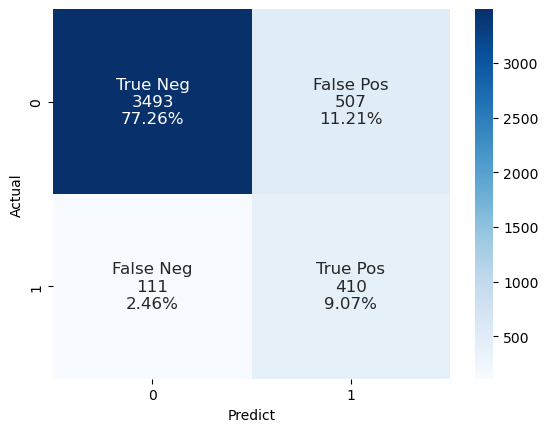

In [96]:
y_LGB_pred = LGB.predict(X_test)

classification_report_LGB = classification_report(y_test, y_LGB_pred)
print(classification_report_LGB)

confusion_matrix_LGB = confusion_matrix(y_test, y_LGB_pred)
make_confusion_matrix (confusion_matrix_LGB)

<a name="5"></a>
# **<h1 id="5" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Feed Forward Neural Network</h1>**

In [48]:
model_ffnn = Sequential([
    Dense(256, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [49]:
model_ffnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model_ffnn.fit(X_train, y_train, epochs=10, batch_size=16)


Epoch 1/10


2826/2826 [==============================] - 12s 3ms/step - loss: 0.2801 - accuracy: 0.8881
Epoch 2/10
2826/2826 [==============================] - 4s 2ms/step - loss: 0.2480 - accuracy: 0.8952
Epoch 3/10
2826/2826 [==============================] - 4s 1ms/step - loss: 0.2415 - accuracy: 0.8970
Epoch 4/10
2826/2826 [==============================] - 4s 1ms/step - loss: 0.2368 - accuracy: 0.8990
Epoch 5/10
2826/2826 [==============================] - 4s 1ms/step - loss: 0.2327 - accuracy: 0.9008
Epoch 6/10
2826/2826 [==============================] - 4s 1ms/step - loss: 0.2289 - accuracy: 0.9014
Epoch 7/10
2826/2826 [==============================] - 4s 1ms/step - loss: 0.2282 - accuracy: 0.9018
Epoch 8/10
2826/2826 [==============================] - 4s 1ms/step - loss: 0.2257 - accuracy: 0.9021
Epoch 9/10
2826/2826 [==============================] - 4s 1ms/step - loss: 0.2236 - accuracy: 0.9032
Epoch 10/10
2826/2826 [==============================] - 4s 1ms/step - loss: 0

142/142 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      4000
           1       0.48      0.67      0.56       521

    accuracy                           0.88      4521
   macro avg       0.72      0.79      0.74      4521
weighted avg       0.90      0.88      0.89      4521



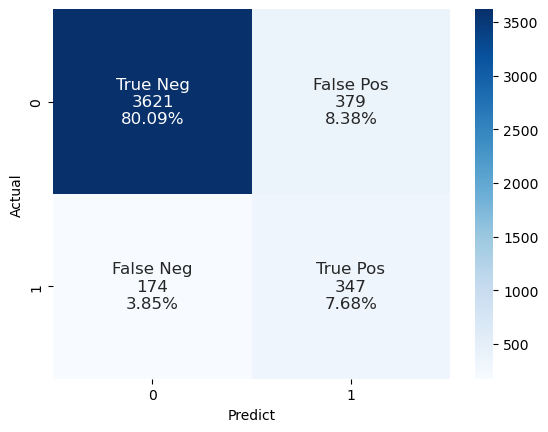

In [50]:
y_pred = model_ffnn.predict(X_test)
y_pred_classes = np.round(y_pred) 

classification_report_ffnn = classification_report(y_test, y_pred_classes)
print(classification_report_ffnn)

confusion_matrix_ffnn = confusion_matrix(y_test, y_pred_classes)
make_confusion_matrix(confusion_matrix_ffnn)

<a name="7"></a>
# **<h1 id="7" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Reccurent Neural Network</h1>**

In [51]:
model_rnn = Sequential([
    LSTM(units=32, input_shape=(19, 1), return_sequences=True),
    LSTM(units=64),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

In [52]:
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
2826/2826 [==============================] - 22s 7ms/step - loss: 0.3600 - accuracy: 0.8830
Epoch 2/10
2826/2826 [==============================] - 20s 7ms/step - loss: 0.3341 - accuracy: 0.8836
Epoch 3/10
2826/2826 [==============================] - 19s 7ms/step - loss: 0.2793 - accuracy: 0.8875
Epoch 4/10
2826/2826 [==============================] - 19s 7ms/step - loss: 0.2654 - accuracy: 0.8908
Epoch 5/10
2826/2826 [==============================] - 19s 7ms/step - loss: 0.2661 - accuracy: 0.8906
Epoch 6/10
2826/2826 [==============================] - 19s 7ms/step - loss: 0.2528 - accuracy: 0.8939
Epoch 7/10
2826/2826 [==============================] - 18s 6ms/step - loss: 0.2561 - accuracy: 0.8928
Epoch 8/10
2826/2826 [==============================] - 18s 6ms/step - loss: 0.2771 - accuracy: 0.8898
Epoch 9/10
2826/2826 [==============================] - 34s 12ms/step - loss: 0.2520 - accuracy: 0.8936
Epoch 10/10
2826/2826 [==============================] - 47s 17ms/step -

142/142 [==============================] - 2s 8ms/step
Confusion Matrix:
None
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      4000
           1       0.46      0.53      0.50       521

    accuracy                           0.88      4521
   macro avg       0.70      0.73      0.71      4521
weighted avg       0.88      0.88      0.88      4521



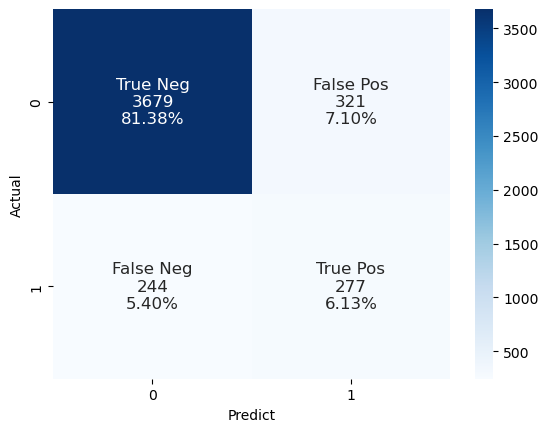

In [53]:
y_pred = model_rnn.predict(X_test)
y_pred_classes = np.round(y_pred) 

cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(make_confusion_matrix(cm))

report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(report)

<a name="8"></a>
# **<h1 id="8" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Overfiting</h1>**

## `Base model`

### `Detect Overfiting of Base Models By StratifiedKFold`

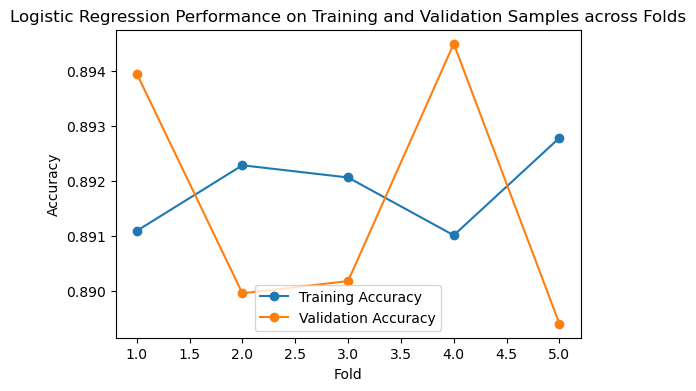

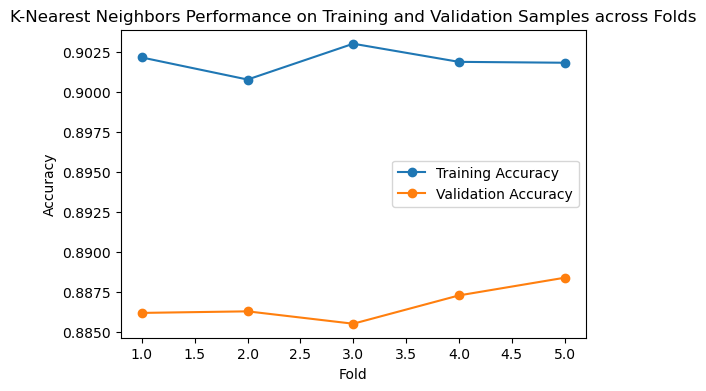

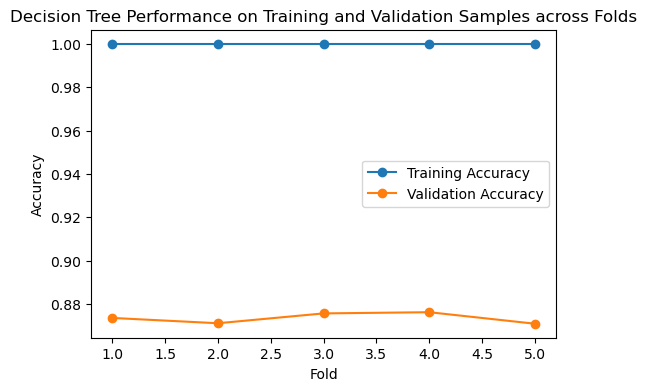

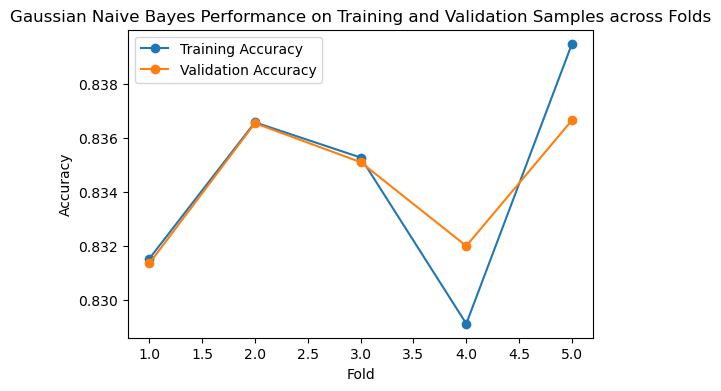

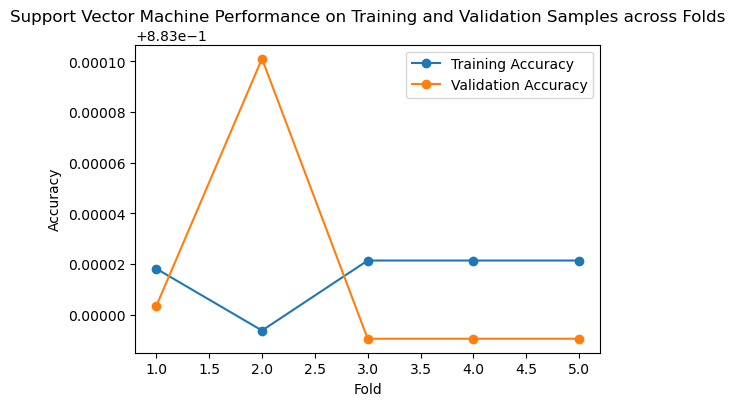

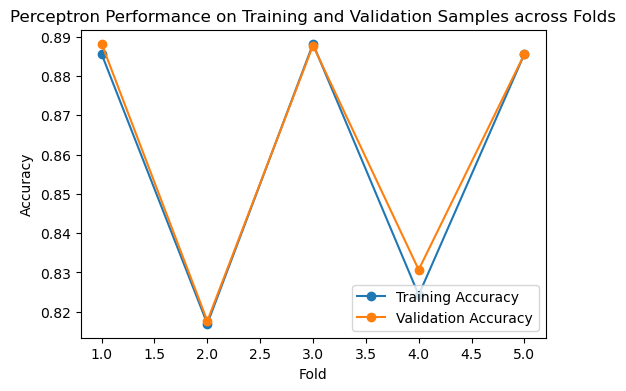

In [54]:
models = [
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=7),
    DecisionTreeClassifier(),
    GaussianNB(),
    SVC(),
    Perceptron()
]

kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

model_names = [
    'Logistic Regression',
    'K-Nearest Neighbors',
    'Decision Tree',
    'Gaussian Naive Bayes',
    'Support Vector Machine',
    'Perceptron'
]

X_train_overfit = np.array(X_train)
y_train_overfit = np.array(y_train)

for i, model in enumerate(models):
    model_train_accuracies = []  
    model_val_accuracies = []    

    for fold, (train_index, val_index) in enumerate(kfold.split(X_train_overfit, y_train_overfit), 1):
        X_train_fold, X_val_fold = X_train_overfit[train_index], X_train_overfit[val_index]
        y_train_fold, y_val_fold = y_train_overfit[train_index], y_train_overfit[val_index]

        model.fit(X_train_fold, y_train_fold)

        y_train_pred = model.predict(X_train_fold)
        train_accuracy = accuracy_score(y_train_fold, y_train_pred)
        model_train_accuracies.append(train_accuracy)

        y_val_pred = model.predict(X_val_fold)
        val_accuracy = accuracy_score(y_val_fold, y_val_pred)
        model_val_accuracies.append(val_accuracy)

    plt.figure(figsize=(6, 4))
    plt.plot(range(1, 6), model_train_accuracies, marker='o', label='Training Accuracy')
    plt.plot(range(1, 6), model_val_accuracies, marker='o', label='Validation Accuracy')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title(f'{model_names[i]} Performance on Training and Validation Samples across Folds')
    plt.legend()
    plt.show()

### `Preventing Overfiting of Base Models By StratifiedKFold and Early Stopping`

In [55]:
kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for i, model in enumerate(models):
    best_val_accuracy = 0.0
    best_model = None
    early_stopping_rounds = 5
    no_improvement_count = 0

    for fold, (train_index, val_index) in enumerate(kfold.split(X_train_overfit, y_train_overfit), 1):
        X_train_fold, X_val_fold = X_train_overfit[train_index], X_train_overfit[val_index]
        y_train_fold, y_val_fold = y_train_overfit[train_index], y_train_overfit[val_index]

        for epoch in range(100):  
            model.fit(X_train_fold, y_train_fold)

            y_train_pred = model.predict(X_train_fold)
            train_accuracy = accuracy_score(y_train_fold, y_train_pred)

            y_val_pred = model.predict(X_val_fold)
            val_accuracy = accuracy_score(y_val_fold, y_val_pred)

            print(f"Fold {fold} - Epoch {epoch + 1} - Training Accuracy: {train_accuracy:.4f} - Validation Accuracy: {val_accuracy:.4f}")

            
            if val_accuracy > best_val_accuracy:
                best_val_accuracy = val_accuracy
                best_model = model
                no_improvement_count = 0
            else:
                no_improvement_count += 1

            
            if no_improvement_count >= early_stopping_rounds:
                print(f"Early stopping at epoch {epoch + 1}")
                break

    y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Best model ({model_names[i]}) accuracy on test set: {test_accuracy:.4f}")

Fold 1 - Epoch 1 - Training Accuracy: 0.8911 - Validation Accuracy: 0.8940
Fold 1 - Epoch 2 - Training Accuracy: 0.8911 - Validation Accuracy: 0.8940
Fold 1 - Epoch 3 - Training Accuracy: 0.8911 - Validation Accuracy: 0.8940
Fold 1 - Epoch 4 - Training Accuracy: 0.8911 - Validation Accuracy: 0.8940
Fold 1 - Epoch 5 - Training Accuracy: 0.8911 - Validation Accuracy: 0.8940
Fold 1 - Epoch 6 - Training Accuracy: 0.8911 - Validation Accuracy: 0.8940
Early stopping at epoch 6
Fold 2 - Epoch 1 - Training Accuracy: 0.8923 - Validation Accuracy: 0.8900
Early stopping at epoch 1
Fold 3 - Epoch 1 - Training Accuracy: 0.8921 - Validation Accuracy: 0.8902
Early stopping at epoch 1
Fold 4 - Epoch 1 - Training Accuracy: 0.8910 - Validation Accuracy: 0.8945
Fold 4 - Epoch 2 - Training Accuracy: 0.8910 - Validation Accuracy: 0.8945
Fold 4 - Epoch 3 - Training Accuracy: 0.8910 - Validation Accuracy: 0.8945
Fold 4 - Epoch 4 - Training Accuracy: 0.8910 - Validation Accuracy: 0.8945
Fold 4 - Epoch 5 - Tra

## `Ensemble learning`

In [56]:
bagging = BaggingClassifier(
    base_estimator=KNeighborsClassifier(n_neighbors=5),
    n_estimators=10,
    random_state=42
)
bagging.fit(X_train, y_train)

voting = VotingClassifier(estimators=[
    ('dt', DecisionTreeClassifier(max_depth=5)),
    ('ada', AdaBoostClassifier(n_estimators=50, learning_rate=0.1)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=5)),
    ('logreg', LogisticRegression())
], voting='hard')
voting.fit(X_train, y_train)

stacking = StackingClassifier(estimators=[
    ('dt', DecisionTreeClassifier(max_depth=5)),
    ('ada', AdaBoostClassifier(n_estimators=50, learning_rate=0.1)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=5))
], final_estimator=LogisticRegression())
stacking.fit(X_train, y_train)

RF = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
RF.fit(X_train, y_train)

GB = GradientBoostingClassifier(max_depth=5)
GB.fit(X_train, y_train)

ADA = AdaBoostClassifier(n_estimators=50, learning_rate=0.1)
ADA.fit(X_train, y_train)

xgb = XGBClassifier(learning_rate=0.1, max_depth=5)
xgb.fit(X_train, y_train)

LGB = lgb.LGBMClassifier(force_col_wise=True,boosting_type='gbdt', random_state=42, n_estimators=200, n_jobs=100, max_depth=5, learning_rate=0.1, num_leaves=64, min_split_gain=0.001, verbosity = 0)
LGB.fit(X_train, y_train)

models = [bagging, voting, stacking, RF, GB, ADA, xgb, LGB]

for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-validation scores for {model.__class__.__name__}: {scores}")
    print(f"Mean cross-validation score for {model.__class__.__name__}: {scores.mean()}\n")

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

## `Feed Forward Neural Network`

In [57]:
model_ffnn = Sequential([
    Dense(256, activation="relu", kernel_regularizer=regularizers.l1(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(128, activation="relu", kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.2),
    Dense(128, activation="relu", kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.2),
    Dense(64, activation="relu", kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.2),
    Dense(32, activation="relu", kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.2),
    Dense(16, activation="relu", kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

In [58]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model_ffnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model_ffnn.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100


1413/1413 [==============================] - 4s 2ms/step - loss: 2.4127 - accuracy: 0.8824 - val_loss: 0.4353 - val_accuracy: 0.8848
Epoch 2/100
1413/1413 [==============================] - 3s 2ms/step - loss: 0.4435 - accuracy: 0.8830 - val_loss: 0.4359 - val_accuracy: 0.8848
Epoch 3/100
1413/1413 [==============================] - 3s 2ms/step - loss: 0.4422 - accuracy: 0.8830 - val_loss: 0.4352 - val_accuracy: 0.8848
Epoch 4/100
1413/1413 [==============================] - 3s 2ms/step - loss: 0.4421 - accuracy: 0.8830 - val_loss: 0.4355 - val_accuracy: 0.8848
Epoch 5/100
1413/1413 [==============================] - 3s 2ms/step - loss: 0.4418 - accuracy: 0.8830 - val_loss: 0.4354 - val_accuracy: 0.8848
Epoch 6/100
1413/1413 [==============================] - 3s 2ms/step - loss: 0.4414 - accuracy: 0.8830 - val_loss: 0.4356 - val_accuracy: 0.8848
Epoch 7/100
1413/1413 [==============================] - 3s 2ms/step - loss: 0.4405 - accuracy: 0.8830 - val_loss: 0.4352 - val_accuracy: 0.88

142/142 [==============================] - 0s 1ms/step
Confusion Matrix:
None
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



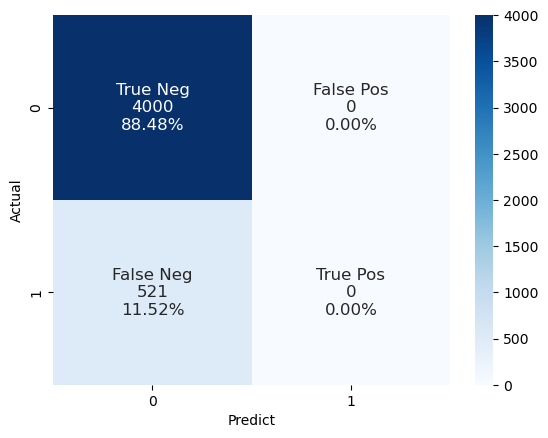

In [59]:
y_pred = model_ffnn.predict(X_test)
y_pred_classes = np.round(y_pred) 

# Obtain the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(make_confusion_matrix(cm))

# Obtain the classification report
report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(report)

## `Recurrent Neural Network`

In [60]:
model_rnn = Sequential([
    LSTM(units=32, input_shape=(19, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(units=64),
    Dropout(0.2),
    Dense(units=32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(units=1)
])

In [61]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model_rnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model_rnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
1413/1413 [==============================] - 14s 8ms/step - loss: 0.3971 - accuracy: 0.8830 - val_loss: 0.3528 - val_accuracy: 0.8848
Epoch 2/20
1413/1413 [==============================] - 11s 8ms/step - loss: 0.3196 - accuracy: 0.8842 - val_loss: 0.3247 - val_accuracy: 0.8848
Epoch 3/20
1413/1413 [==============================] - 11s 8ms/step - loss: 0.2836 - accuracy: 0.8866 - val_loss: 0.3640 - val_accuracy: 0.8169
Epoch 4/20
1413/1413 [==============================] - 11s 8ms/step - loss: 0.2692 - accuracy: 0.8885 - val_loss: 0.3015 - val_accuracy: 0.8872
Epoch 5/20
1413/1413 [==============================] - 11s 8ms/step - loss: 0.2642 - accuracy: 0.8888 - val_loss: 0.3129 - val_accuracy: 0.8430
Epoch 6/20
1413/1413 [==============================] - 11s 8ms/step - loss: 0.2624 - accuracy: 0.8907 - val_loss: 0.3027 - val_accuracy: 0.8706
Epoch 7/20
1413/1413 [==============================] - 11s 8ms/step - loss: 0.2542 - accuracy: 0.8916 - val_loss: 0.2931 - val_ac

142/142 [==============================] - 1s 3ms/step
Confusion Matrix:
None
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      4000
           1       0.47      0.64      0.54       521

    accuracy                           0.88      4521
   macro avg       0.71      0.77      0.74      4521
weighted avg       0.90      0.88      0.88      4521



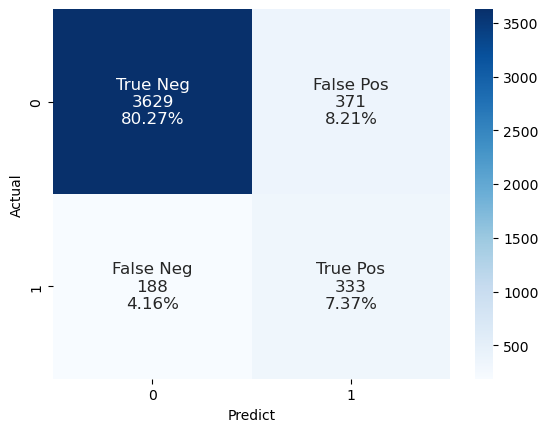

In [62]:
y_pred = model_rnn.predict(X_test)
y_pred_classes = np.round(y_pred) 

# Obtain the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(make_confusion_matrix(cm))

# Obtain the classification report
report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(report)

<a name="7"></a>
# **<h1 id="7" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Improve model</h1>**

**Method for improve model**
+ finding hyperparameter by using grid view for some models
+ Handle imbalanced data
+ Using StandardScaler instead of MinMaxScaler for Boundary-based models, Neural Networks models

In [25]:
def make_confusion_matrix_2_models(cm1, cm2, model1_name, model2_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts1 = ['{0:0.0f}'.format(value) for value in cm1.flatten()]
    group_percentages1 = ['{0:.2%}'.format(value) for value in cm1.flatten() / np.sum(cm1)]
    labels1 = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts1, group_percentages1)]
    labels1 = np.asarray(labels1).reshape(2, 2)

    axe1 = sns.heatmap(cm1, annot=labels1, fmt='', cmap='Blues', cbar=True, annot_kws={'fontsize': 12}, ax=axes[0])
    axe1.set(xlabel="Predict", ylabel="Actual")
    axe1.set_title(model1_name)

    group_counts2 = ['{0:0.0f}'.format(value) for value in cm2.flatten()]
    group_percentages2 = ['{0:.2%}'.format(value) for value in cm2.flatten() / np.sum(cm2)]
    labels2 = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts2, group_percentages2)]
    labels2 = np.asarray(labels2).reshape(2, 2)

    axe2 = sns.heatmap(cm2, annot=labels2, fmt='', cmap='Blues', cbar=True, annot_kws={'fontsize': 12}, ax=axes[1])
    axe2.set(xlabel="Predict", ylabel="Actual")
    axe2.set_title(model2_name)

    plt.tight_layout()
    plt.show()

## `Improvement by Grid Search`

### `KNN`

In [205]:
my_params = {
    'n_neighbors': [1,2,3,4,5,6,7,13,14,15,16,17,18,19,20,21,22,23,24,25],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3] 
}
knn=KNeighborsClassifier()
grid=GridSearchCV(knn,my_params, cv=5, error_score="raise", scoring='accuracy').fit(X_train.values,y_train)

sorted(grid.cv_results_.keys())
grid_search_results=pd.DataFrame(grid.cv_results_)[['mean_test_score','std_test_score','params','rank_test_score','mean_fit_time']]
grid_search_results

,mean_test_score,std_test_score,params,rank_test_score,mean_fit_time
0,0.447139,0.200070,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",102,0.003847
1,0.447139,0.200070,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}",102,0.004503
2,0.416549,0.209231,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",115,0.006917
3,0.416549,0.209231,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",115,0.005758
4,0.411285,0.206754,"{'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}",118,0.005261
...,...,...,...,...,...
115,0.615995,0.138894,"{'n_neighbors': 25, 'p': 1, 'weights': 'distan...",11,0.005793
116,0.557866,0.180160,"{'n_neighbors': 25, 'p': 2, 'weights': 'uniform'}",31,0.004414
117,0.538578,0.189929,"{'n_neighbors': 25, 'p': 2, 'weights': 'distan...",40,0.005234
118,0.535216,0.200683,"{'n_neighbors': 25, 'p': 3, 'weights': 'uniform'}",42,0.003392


In [209]:
grid.best_params_

{'n_neighbors': 24, 'p': 1, 'weights': 'uniform'}

In [210]:
knn=KNeighborsClassifier(n_neighbors = 24, weights='uniform', p=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=24, p=1)

In [211]:
y_KNN_pred = knn.predict(X_test)
classification_report_KNN_improve = classification_report(y_test, y_KNN_pred)
confusion_matrix_KNN_improve = confusion_matrix(y_test, y_KNN_pred)

Before Improvement: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      4000
           1       0.69      0.26      0.38       521

    accuracy                           0.90      4521
   macro avg       0.80      0.62      0.66      4521
weighted avg       0.89      0.90      0.88      4521

After Improvement: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      4000
           1       0.69      0.09      0.16       521

    accuracy                           0.89      4521
   macro avg       0.79      0.54      0.55      4521
weighted avg       0.87      0.89      0.85      4521



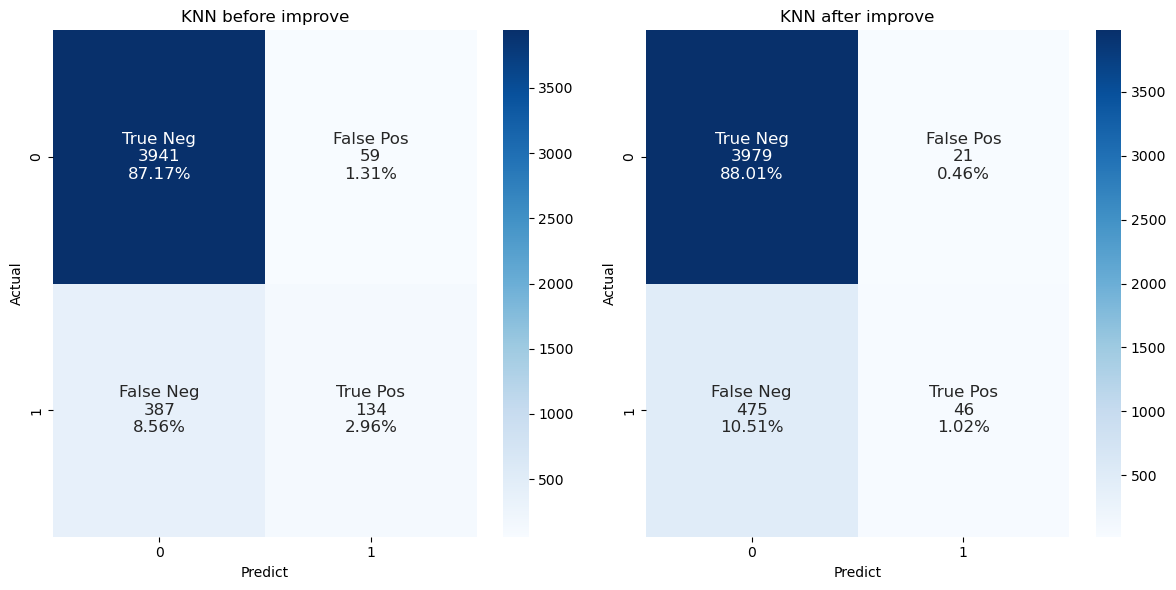

In [212]:
print("Before Improvement: \n", classification_report_KNN)
print("After Improvement: \n", classification_report_KNN_improve)
make_confusion_matrix_2_models(confusion_matrix_KNN, confusion_matrix_KNN_improve, "KNN before improve", "KNN after improve")

### `Decision Tree`

In [69]:
dt_classifier = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [70]:
y_DT_pred = best_estimator.predict(X_test)
classification_report_DT_improve = classification_report(y_test, y_DT_pred)
confusion_matrix_DT_improve = confusion_matrix(y_test, y_DT_pred)

Before Improvement: 
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      4000
           1       0.29      0.62      0.40       521

    accuracy                           0.78      4521
   macro avg       0.62      0.71      0.63      4521
weighted avg       0.87      0.78      0.81      4521

After Improvement: 
               precision    recall  f1-score   support

           0       0.94      0.89      0.91      4000
           1       0.40      0.56      0.46       521

    accuracy                           0.85      4521
   macro avg       0.67      0.72      0.69      4521
weighted avg       0.88      0.85      0.86      4521



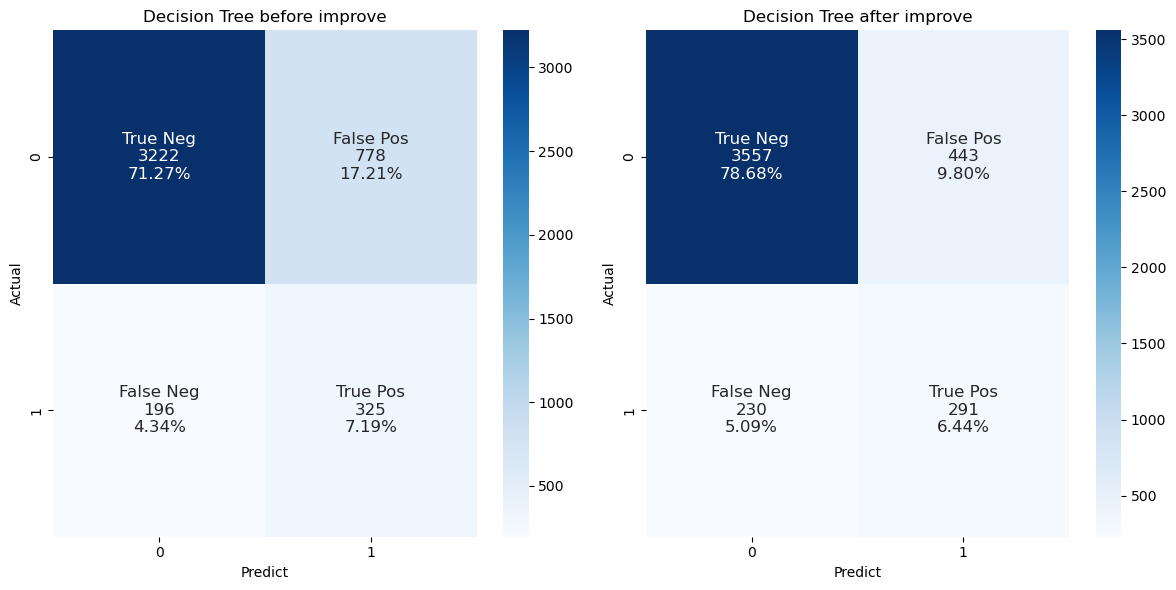

In [71]:
print("Before Improvement: \n", classification_report_DT)
print("After Improvement: \n", classification_report_DT_improve)
make_confusion_matrix_2_models(confusion_matrix_DT, confusion_matrix_DT_improve, "Decision Tree before improve", "Decision Tree after improve")

### `Random Forest`

In [72]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 100)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 218, 236, 254, 272, 290, 309, 327, 345, 363, 381, 400, 418, 436, 454, 472, 490, 509, 527, 545, 563, 581, 600, 618, 636, 654, 672, 690, 709, 727, 745, 763, 781, 800, 818, 836, 854, 872, 890, 909, 927, 945, 963, 981, 1000, 1018, 1036, 1054, 1072, 1090, 1109, 1127, 1145, 1163, 1181, 1200, 1218, 1236, 1254, 1272, 1290, 1309, 1327, 1345, 1363, 1381, 1400, 1418, 1436, 1454, 1472, 1490, 1509, 1527, 1545, 1563, 1581, 1600, 1618, 1636, 1654, 1672, 1690, 1709, 1727, 1745, 1763, 1781, 1800, 1818, 1836, 1854, 1872, 1890, 1909, 1927, 1945, 1963, 1981, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [73]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

rf_random.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


{'n_estimators': 1745,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [74]:
randomforestmodel=RandomForestClassifier(n_estimators= 1745,
    min_samples_split = 5,
    min_samples_leaf = 4,
    max_features = 'sqrt',
    max_depth= 10,
    bootstrap= True)

randomforestmodel.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=1745)

In [75]:
y_RF_pred = randomforestmodel.predict(X_test)
classification_report_RF_improve = classification_report(y_test, y_KNN_pred)
confusion_matrix_RF_improve = confusion_matrix(y_test, y_RF_pred)

Before Improvement: 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      4000
           1       0.49      0.73      0.59       521

    accuracy                           0.88      4521
   macro avg       0.73      0.82      0.76      4521
weighted avg       0.91      0.88      0.89      4521

After Improvement: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      4000
           1       0.60      0.11      0.18       521

    accuracy                           0.89      4521
   macro avg       0.75      0.55      0.56      4521
weighted avg       0.86      0.89      0.85      4521



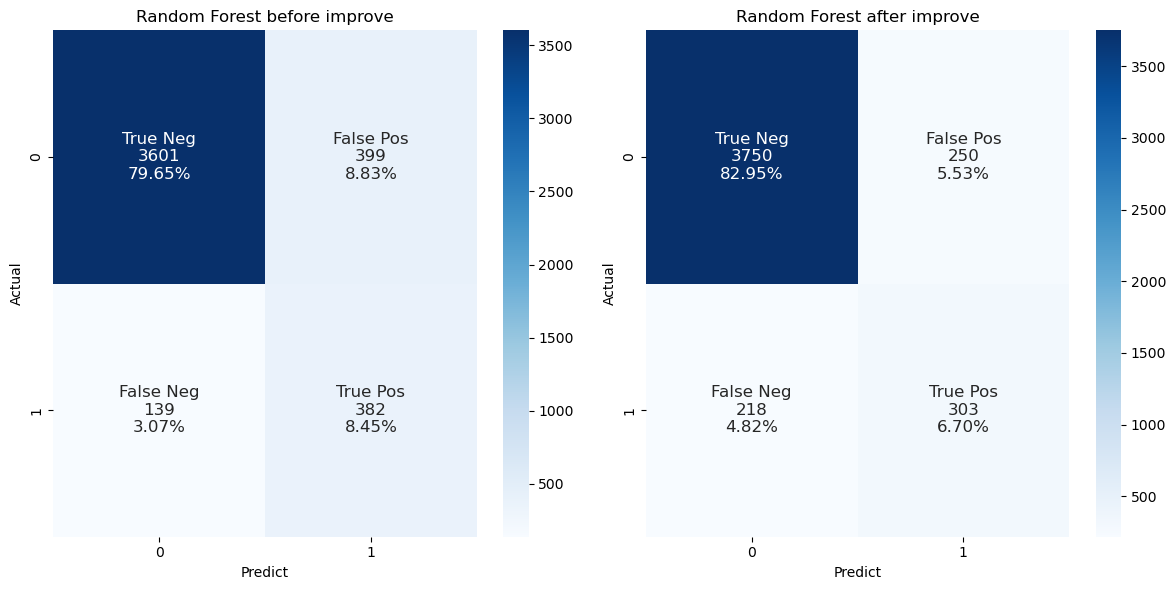

In [76]:
print("Before Improvement: \n", classification_report_RF)
print("After Improvement: \n", classification_report_RF_improve)
make_confusion_matrix_2_models(confusion_matrix_RF, confusion_matrix_RF_improve, "Random Forest before improve", "Random Forest after improve")

### `XGBoost`

In [77]:
xgb_classifier = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
}

grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train,y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}


In [78]:
y_xgb_pred = best_estimator.predict(X_test)
classification_report_xgb_improve = classification_report(y_test, y_xgb_pred)
confusion_matrix_xgb_improve = confusion_matrix(y_test, y_xgb_pred)

Before Improvement: 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      4000
           1       0.44      0.73      0.55       521

    accuracy                           0.86      4521
   macro avg       0.70      0.80      0.74      4521
weighted avg       0.90      0.86      0.88      4521

After Improvement: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



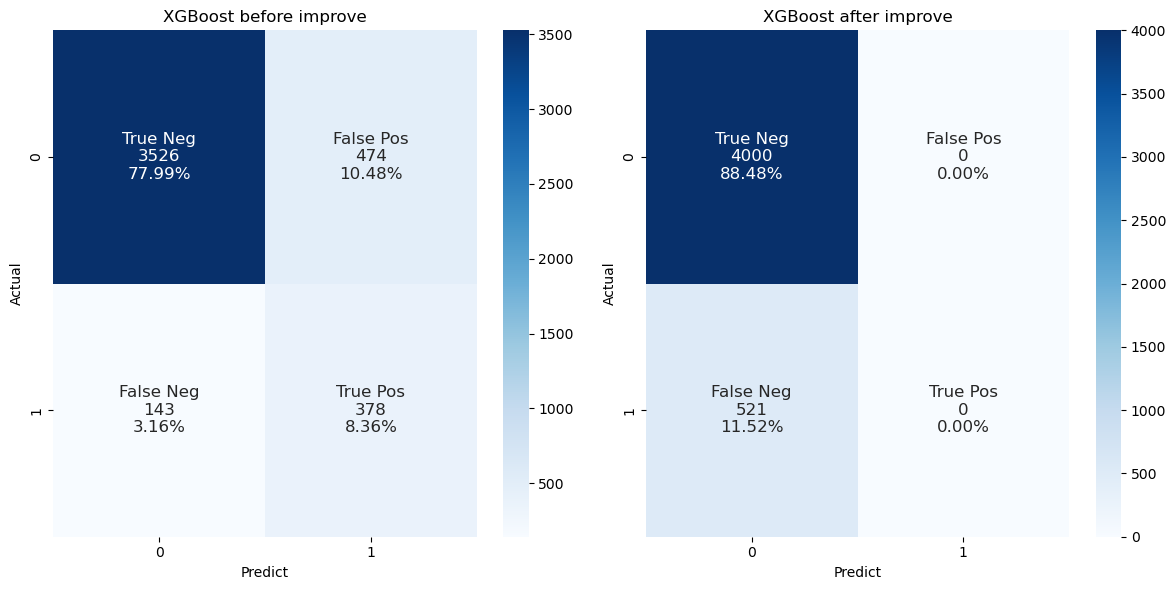

In [79]:
print("Before Improvement: \n", classification_report_xgb)
print("After Improvement: \n", classification_report_xgb_improve)
make_confusion_matrix_2_models(confusion_matrix_xgb, confusion_matrix_xgb_improve, "XGBoost before improve", "XGBoost after improve")

**Conclusion:** 
+ There are some improvements compared to the previous models. With this dataset, focusing on recall in order to prevent predict unpotential customers leading to loss about cost of marketing campaign
+ One model is good when f1-score is high. As can be seen, almost f1-scores are higer than the previous one

## `Handle Imbalanced Data`

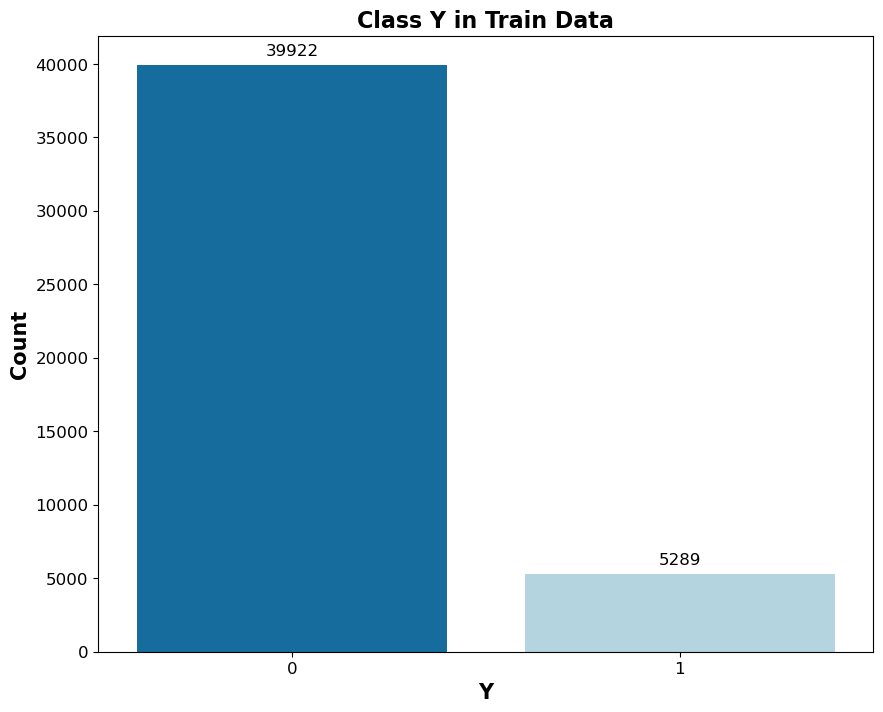

In [80]:
custom_palette = ["#0072B2", "#ADD8E6"]
plt.figure(figsize=(10, 8))
sns.set_palette(custom_palette)
ax = sns.countplot(x='y', data=train_df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize=12,
                color='black')
plt.title('Class Y in Train Data', fontweight='bold', fontsize=16)
plt.xlabel('Y', fontsize=15,fontweight='bold')
plt.ylabel('Count', fontsize=15,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [46]:
from imblearn.over_sampling import SMOTE

adasyn = SMOTE(random_state=42)

train_df_balance, y_train_balance = adasyn.fit_resample(train_df, y_train)

from collections import Counter
print("Updated dataset Train: ", Counter(y_train_balance))

test_df_balance, y_test_balance = adasyn.fit_resample(test_df, y_test)

from collections import Counter
print("Updated dataset Test: ", Counter(y_test_balance))

Updated dataset Train:  Counter({0: 39922, 1: 39922})
Updated dataset Test:  Counter({0: 4000, 1: 4000})


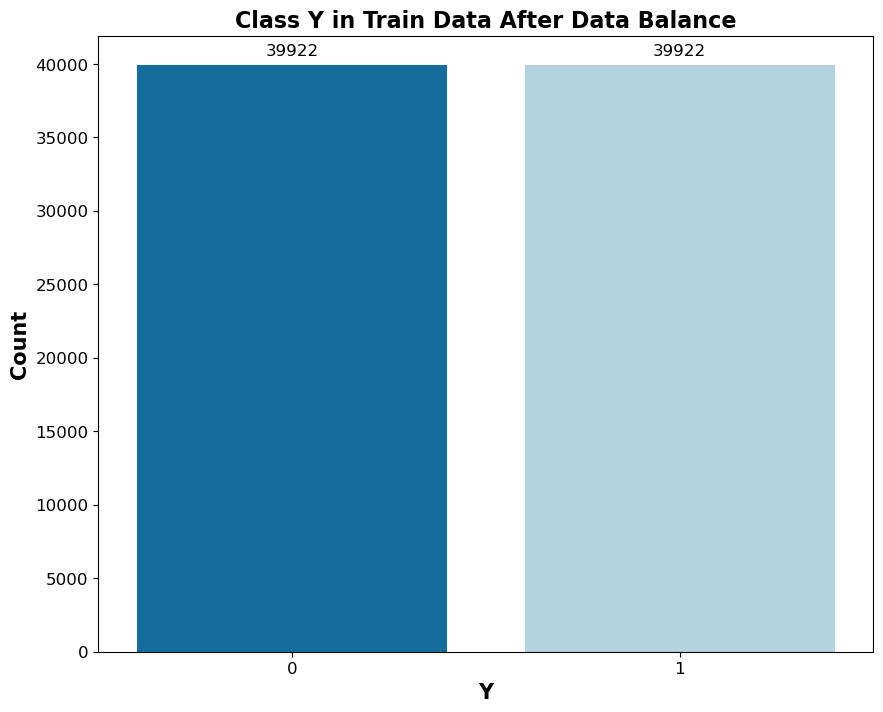

In [47]:
custom_palette = ["#0072B2", "#ADD8E6"]
plt.figure(figsize=(10, 8))
sns.set_palette(custom_palette)
ax = sns.countplot(x='y', data=train_df_balance)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize=12,
                color='black')
plt.title('Class Y in Train Data After Data Balance', fontweight='bold', fontsize=16)
plt.xlabel('Y', fontsize=15,fontweight='bold')
plt.ylabel('Count', fontsize=15,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [48]:
X_train_balance = train_df_balance.drop(["y"], axis = 1)
y_train_balance = train_df_balance["y"]

X_test_balance = test_df_balance.drop(["y"], axis = 1)
y_test_balance = test_df_balance["y"]

### `LightGBM`

In [49]:
LGB = lgb.LGBMClassifier(random_state=42, n_estimators=200, n_jobs=100)
LGB.fit(X_train_balance, y_train_balance)

y_LGB_pred = LGB.predict(X_test_balance)

classification_report_LGB_improve = classification_report(y_test_balance, y_LGB_pred)
confusion_matrix_LGB_improve = confusion_matrix(y_test_balance, y_LGB_pred)

[LightGBM] [Info] Number of positive: 39922, number of negative: 39922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1609
[LightGBM] [Info] Number of data points in the train set: 79844, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Before Improvement: 
               precision    recall  f1-score   support

           0       0.97      0.87      0.92      4000
           1       0.45      0.79      0.57       521

    accuracy                           0.86      4521
   macro avg       0.71      0.83      0.74      4521
weighted avg       0.91      0.86      0.88      4521

After Improvement: 
               precision    recall  f1-score   support

           0       0.99      0.46      0.62      4000
           1       0.65      1.00      0.78      4000

    accuracy                           0.73      8000
   macro avg       0.82      0.73      0.70      8000
weighted avg       0.82      0.73      0.70      8000



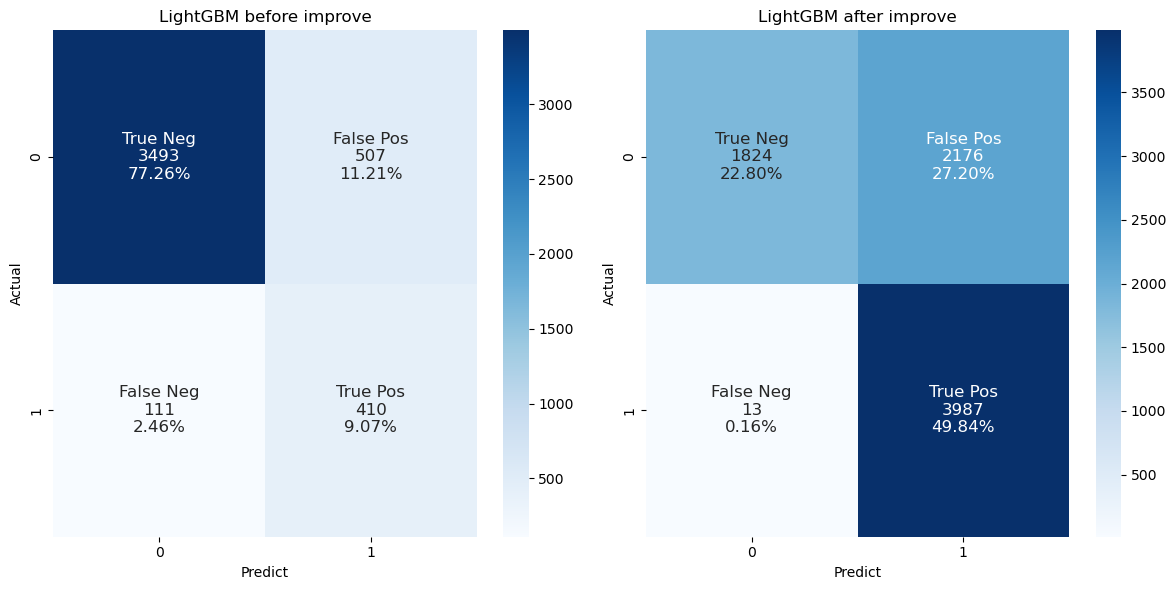

In [53]:
print("Before Improvement: \n", classification_report_LGB)
print("After Improvement: \n", classification_report_LGB_improve)
make_confusion_matrix_2_models(confusion_matrix_LGB, confusion_matrix_LGB_improve, "LightGBM before improve", "LightGBM after improve")

### `XGBoost`

In [54]:
xgb_classifier = XGBClassifier(random_state=42)

xgb_classifier.fit(X_train_balance, y_train_balance)

y_xgb_pred = xgb_classifier.predict(X_test_balance)

classification_report_xgb_improve = classification_report(y_test_balance, y_xgb_pred)
confusion_matrix_xgb_improve = confusion_matrix(y_test_balance, y_xgb_pred)

Before Improvement: 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      4000
           1       0.44      0.73      0.55       521

    accuracy                           0.86      4521
   macro avg       0.70      0.80      0.74      4521
weighted avg       0.90      0.86      0.88      4521

After Improvement: 
               precision    recall  f1-score   support

           0       0.99      0.50      0.66      4000
           1       0.67      0.99      0.80      4000

    accuracy                           0.75      8000
   macro avg       0.83      0.75      0.73      8000
weighted avg       0.83      0.75      0.73      8000



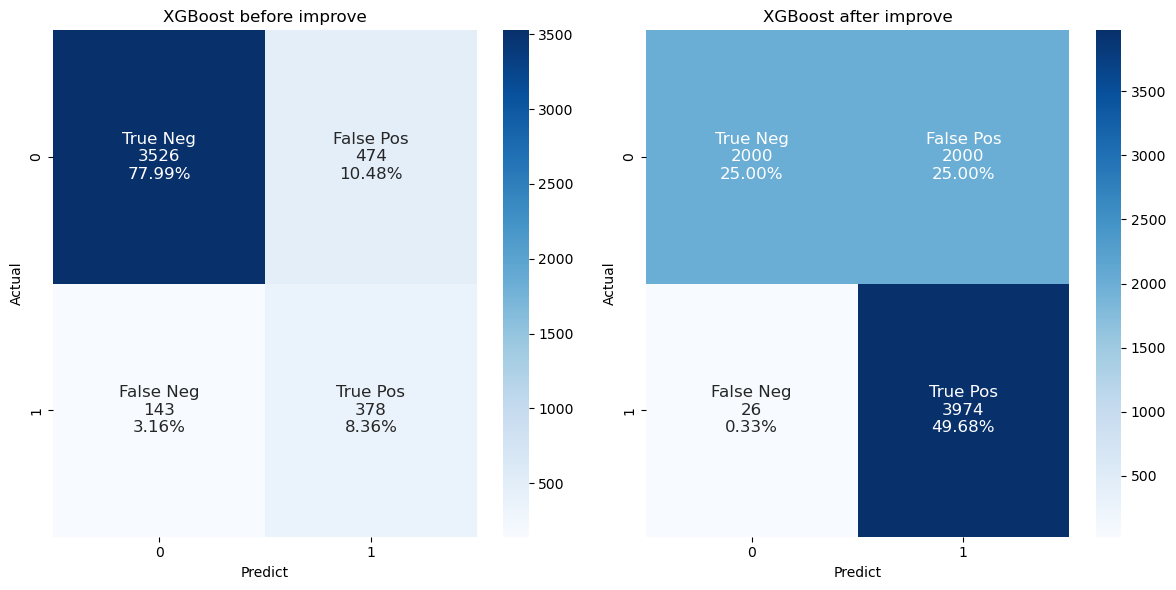

In [55]:
print("Before Improvement: \n", classification_report_xgb)
print("After Improvement: \n", classification_report_xgb_improve)
make_confusion_matrix_2_models(confusion_matrix_xgb, confusion_matrix_xgb_improve, "XGBoost before improve", "XGBoost after improve")

### `Analysis, Solution, Compare and Conclusion`

**Analysis Error:**
+ Overfitting: Data equalization processes like RandomOverSampler or ADASYN can generate too many new samples, leading to the model overlearning from minority data. As a result, the model may overfit the training data and not generalize well on new data.

+ Information loss: The data equalization process may lose some important information from the original data, especially when oversampling is applied. This may cause the model to not have enough information to accurately classify new samples.

+ Sampling bias: Data balancing methods can create non-random samples, causing bias in the sampling process. This can prevent the model from generalizing well on new data and lead to poor performance.

**Solution:**
This data may belong to the problem of anomaly detection. Thus, we use Isolation Forest, LocalOutlierFactor, OneClassSVM for this problem

In [16]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=200, max_samples=len(X_train), contamination=0.000001,random_state=42, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=100, algorithm='auto', leaf_size=50, metric='minkowski',  p=2, metric_params=None, contamination=.000001),
    "Support Vector Machine":OneClassSVM(kernel='rbf', gamma='auto', nu=0.001, max_iter=-1)
   }

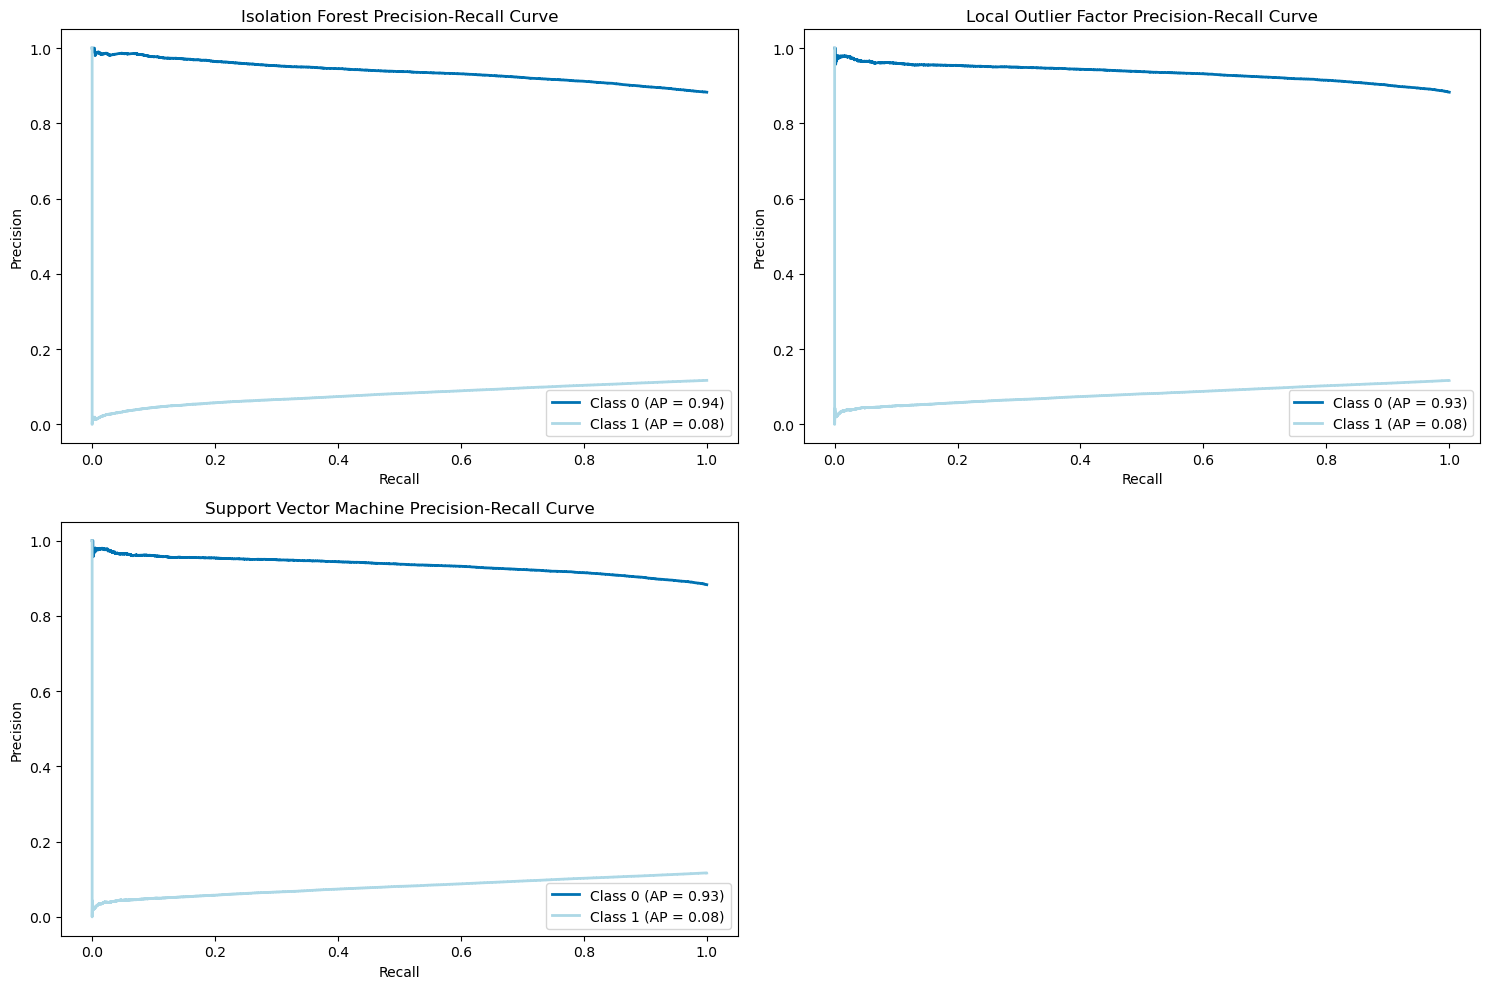

Isolation Forest: 5288
Average Precision Scores:
Class 0: 0.94
Class 1: 0.08
Classification Report :
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     39922
           1       0.21      0.01      0.02      5289

    accuracy                           0.88     45211
   macro avg       0.55      0.50      0.48     45211
weighted avg       0.81      0.88      0.83     45211

Local Outlier Factor: 5290
Average Precision Scores:
Class 0: 0.93
Class 1: 0.08
Classification Report :
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     39922
           1       0.21      0.01      0.02      5289

    accuracy                           0.88     45211
   macro avg       0.55      0.50      0.48     45211
weighted avg       0.81      0.88      0.83     45211

Support Vector Machine: 5434
Average Precision Scores:
Class 0: 0.93
Class 1: 0.08
Classification Report :
              precision    recall

In [89]:
from sklearn.metrics import precision_recall_curve, average_precision_score

results = {}
plt.figure(figsize=(15, 10))

for i, (clf_name, clf) in enumerate(classifiers.items(), 1):
    plt.subplot(2, 2, i)

    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X_train)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X_train)
        y_pred = clf.predict(X_train)
    else:
        clf.fit(X_train)
        scores_prediction = clf.decision_function(X_train)
        y_pred = clf.predict(X_train)

    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y_train).sum()

    precision = dict()
    recall = dict()
    average_precision = dict()

    for class_label in np.unique(y_train):
        precision[class_label], recall[class_label], _ = precision_recall_curve(y_train == class_label, scores_prediction)
        average_precision[class_label] = average_precision_score(y_train == class_label, scores_prediction)

        plt.plot(recall[class_label], precision[class_label], lw=2, label='Class {} (AP = {:.2f})'.format(class_label, average_precision[class_label]))

    results[clf_name] = {
        "n_errors": n_errors,
        "precision": precision,
        "recall": recall,
        "average_precision": average_precision
    }

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("{} Precision-Recall Curve".format(clf_name))
    plt.legend()

plt.tight_layout()
plt.show()

for clf_name, result in results.items():
    print("{}: {}".format(clf_name, result["n_errors"]))
    print("Average Precision Scores:")
    for class_label, average_precision in result["average_precision"].items():
        print("Class {}: {:.2f}".format(class_label, average_precision))
    print("Classification Report :")
    print(classification_report(y_train, y_pred))

**Conclusion:** The three models Isolation Forest, Local Outlier Factor and Support Vector Machine can all be used for the problem of anomaly detection as well as the purpose of predicting the likelihood of a customer registering a term deposit.

As can be seen, this methods does not bring higher performance

We want to improve precision recall and f1-score of 2 class, so we find another method in the next section

## `StandardScaler data combine with Hyperparameters of each model`

In [16]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

In [17]:
train_df = pd.get_dummies(train_df, columns=['education'])
test_df = pd.get_dummies(test_df, columns=['education'])

In [18]:
le = LabelEncoder()
train_df = train_df.apply(le.fit_transform)
test_df = test_df.apply(le.fit_transform)

In [19]:
columns_to_scale = ['age','balance','duration','campaign','pdays','previous']
scaler = StandardScaler()

# FOR TRAIN DATA
scaled_values = scaler.fit_transform(train_df[columns_to_scale])
train_df[columns_to_scale] = scaled_values

aggregated_train = train_df[columns_to_scale].agg(['mean', 'min', 'max', 'median', 'std']).style.background_gradient(cmap='Greens')
aggregated_train

,age,balance,duration,campaign,pdays,previous
mean,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000
min,-2.160134,-1.341500,-1.065428,-0.572970,-0.414317,-0.305354
max,4.997600,3.555608,5.493914,14.707259,5.343218,20.997541
median,-0.182339,-0.409498,-0.314358,-0.247859,-0.414317,-0.305354
std,1.000011,1.000011,1.000011,1.000011,1.000011,1.000011


In [20]:
# FOR TEST DATA
scaled_values = scaler.fit_transform(test_df[columns_to_scale])
test_df[columns_to_scale] = scaled_values

aggregated_train = test_df[columns_to_scale].agg(['mean', 'min', 'max', 'median', 'std']).style.background_gradient(cmap='Greens')
aggregated_train

,age,balance,duration,campaign,pdays,previous
mean,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
min,-2.097864,-1.413728,-1.229120,-0.595036,-0.397524,-0.325061
max,4.148004,2.302702,3.222380,9.749162,4.162445,13.522041
median,-0.205177,-0.312388,-0.307242,-0.261352,-0.397524,-0.325061
std,1.000111,1.000111,1.000111,1.000111,1.000111,1.000111


In [21]:
X_train = train_df.drop(columns=['y'], axis =1)
y_train = train_df['y']

X_test = test_df.drop(columns=['y'], axis =1)
y_test = test_df['y']

### `Logistic Regression`

In [22]:
LR = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0, max_iter=1000)
LR.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.5, max_iter=1000, penalty='elasticnet',
                   solver='saga')

In [23]:
y_LR_pred = LR.predict(X_test)
classification_report_LR_improve = classification_report(y_test, y_LR_pred)
confusion_matrix_LR_improve = confusion_matrix(y_test, y_LR_pred)

Before Improvement: 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      4000
           1       0.42      0.61      0.50       521

    accuracy                           0.86      4521
   macro avg       0.68      0.75      0.71      4521
weighted avg       0.89      0.86      0.87      4521

After Improvement: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94      4000
           1       0.49      0.20      0.29       521

    accuracy                           0.88      4521
   macro avg       0.70      0.59      0.61      4521
weighted avg       0.86      0.88      0.86      4521



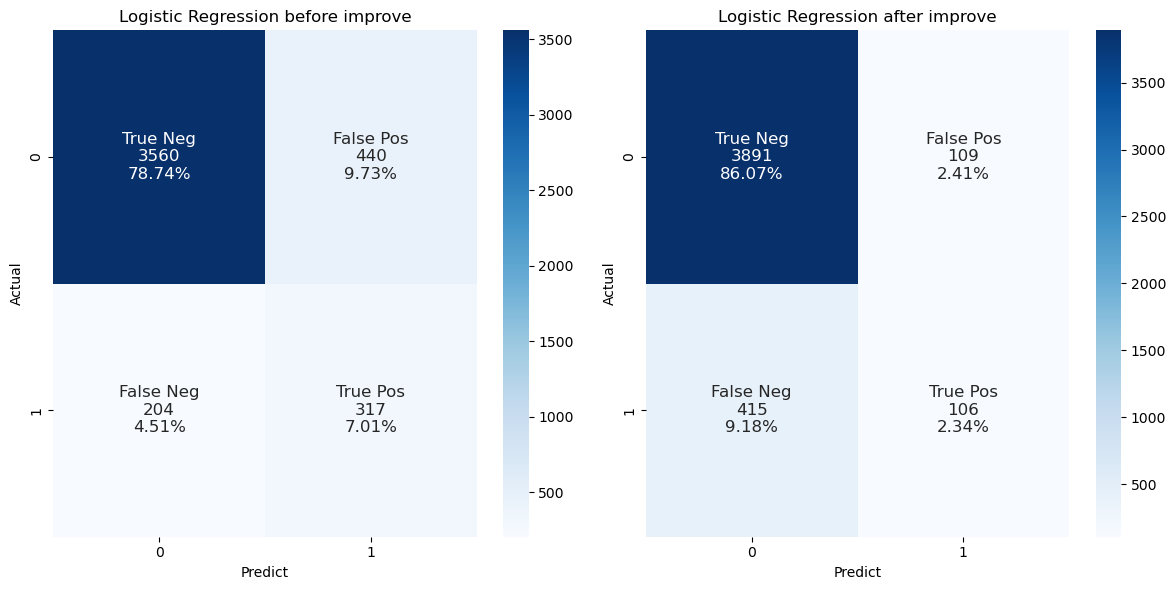

In [26]:
print("Before Improvement: \n", classification_report_LR)
print("After Improvement: \n", classification_report_LR_improve)
make_confusion_matrix_2_models(confusion_matrix_LR, confusion_matrix_LR_improve, "Logistic Regression before improve", "Logistic Regression after improve")

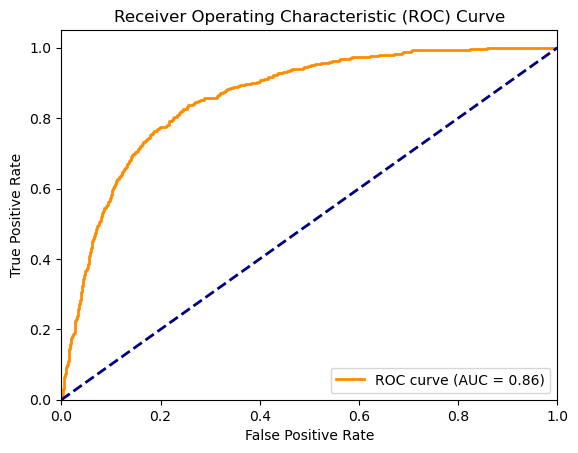

In [27]:
y_LR_probs = LR.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_LR_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### `K-Nearest Neighbors`

In [128]:
KNN = KNeighborsClassifier(n_neighbors=7, p=2, weights='distance')
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [129]:
y_KNN_pred = KNN.predict(X_test.values)
classification_report_KNN_improve = classification_report(y_test, y_KNN_pred)
confusion_matrix_KNN_improve = confusion_matrix(y_test, y_KNN_pred)

Before Improvement: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      4000
           1       0.69      0.26      0.38       521

    accuracy                           0.90      4521
   macro avg       0.80      0.62      0.66      4521
weighted avg       0.89      0.90      0.88      4521

After Improvement: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4000
           1       0.97      0.85      0.90       521

    accuracy                           0.98      4521
   macro avg       0.97      0.92      0.95      4521
weighted avg       0.98      0.98      0.98      4521



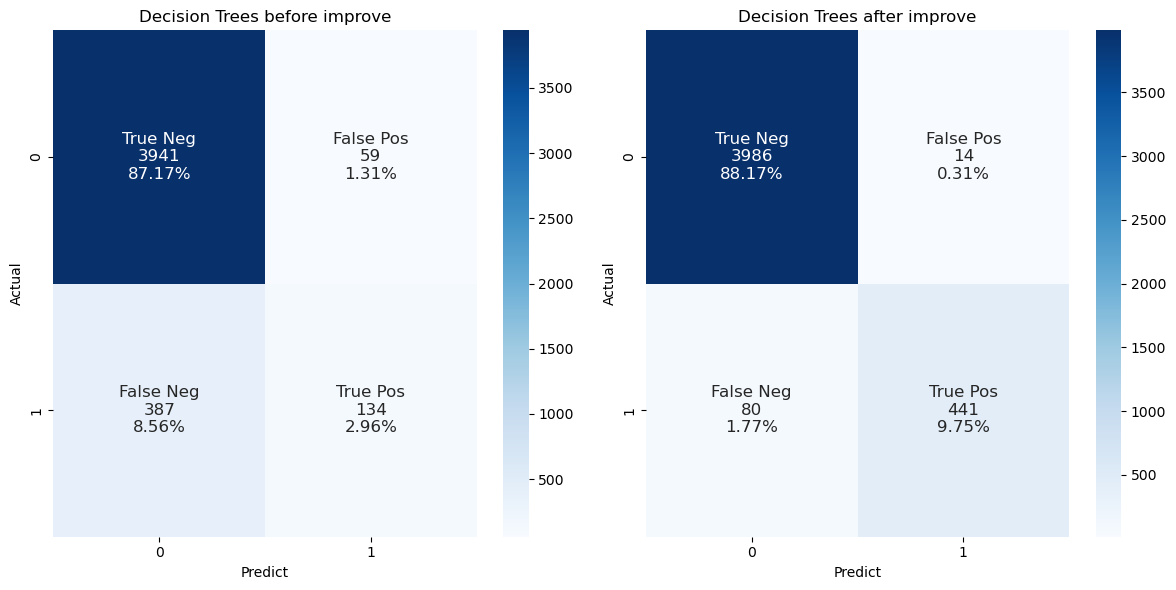

In [130]:
print("Before Improvement: \n", classification_report_KNN)
print("After Improvement: \n", classification_report_KNN_improve)
make_confusion_matrix_2_models(confusion_matrix_KNN, confusion_matrix_KNN_improve, "Decision Trees before improve", "Decision Trees after improve")

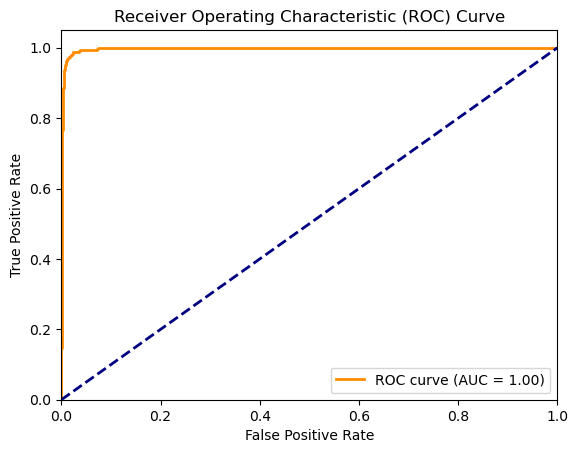

In [131]:
y_KNN_probs = KNN.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_KNN_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### `Decision Trees`

In [132]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [133]:
y_DT_pred = DT.predict(X_test.values)
classification_report_DT_improve = classification_report(y_test, y_DT_pred)
confusion_matrix_DT_improve = confusion_matrix(y_test, y_DT_pred)

Before Improvement: 
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      4000
           1       0.30      0.64      0.41       521

    accuracy                           0.79      4521
   macro avg       0.62      0.72      0.64      4521
weighted avg       0.87      0.79      0.82      4521

After Improvement: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      4000
           1       0.51      0.66      0.57       521

    accuracy                           0.89      4521
   macro avg       0.73      0.79      0.75      4521
weighted avg       0.90      0.89      0.89      4521



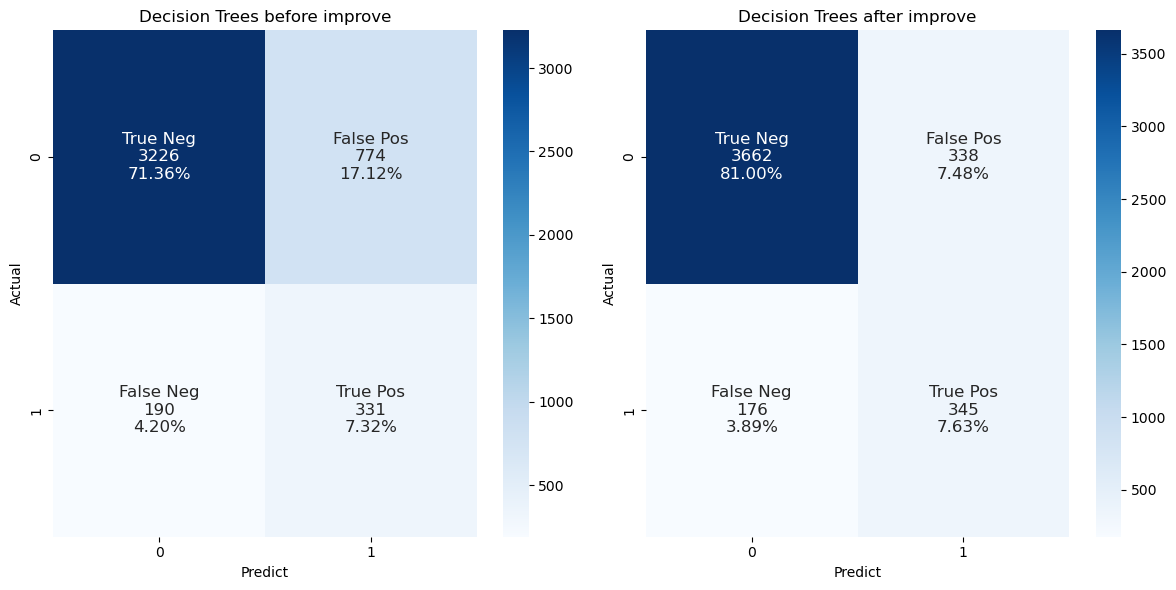

In [134]:
print("Before Improvement: \n", classification_report_DT)
print("After Improvement: \n", classification_report_DT_improve)
make_confusion_matrix_2_models(confusion_matrix_DT, confusion_matrix_DT_improve, "Decision Trees before improve", "Decision Trees after improve")

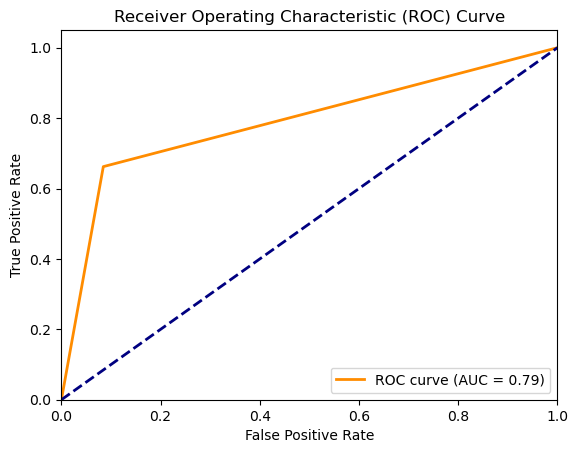

In [135]:
y_DT_probs = DT.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_DT_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### `SVM`

In [123]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [124]:
y_svm_pred=svm.predict(X_test)
classification_report_svm_improve = classification_report(y_test, y_svm_pred)
confusion_matrix_svm_improve = confusion_matrix(y_test, y_svm_pred)

Before Improvement: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521

After Improvement: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      4000
           1       1.00      0.01      0.02       521

    accuracy                           0.89      4521
   macro avg       0.94      0.50      0.48      4521
weighted avg       0.90      0.89      0.83      4521



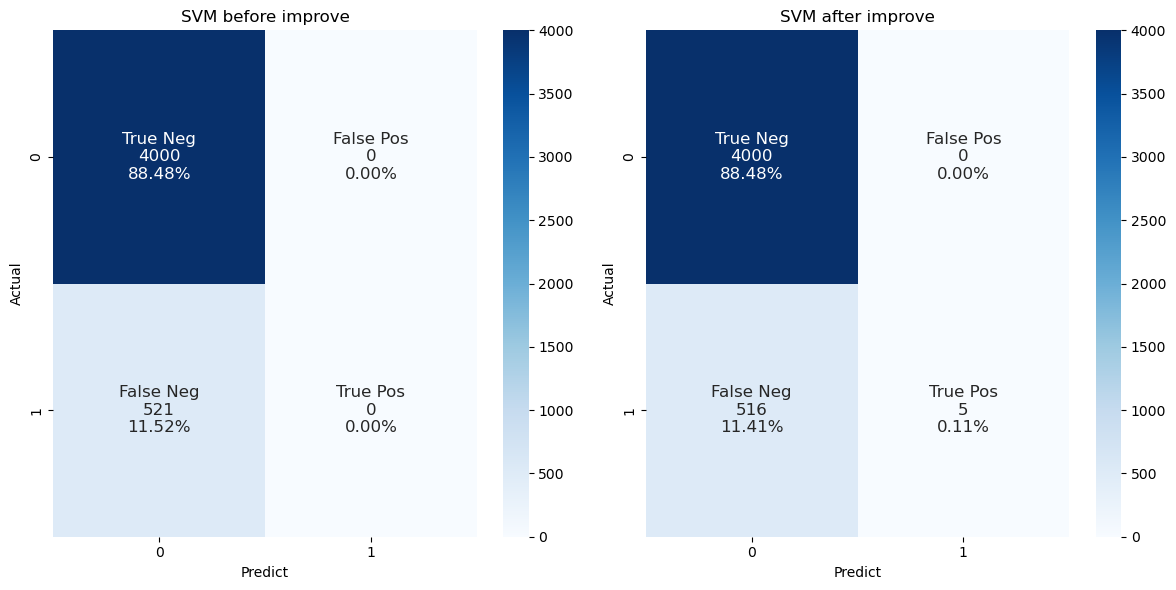

In [125]:
print("Before Improvement: \n", classification_report_svm)
print("After Improvement: \n", classification_report_svm_improve)
make_confusion_matrix_2_models(confusion_matrix_svm, confusion_matrix_svm_improve, "SVM before improve", "SVM after improve")

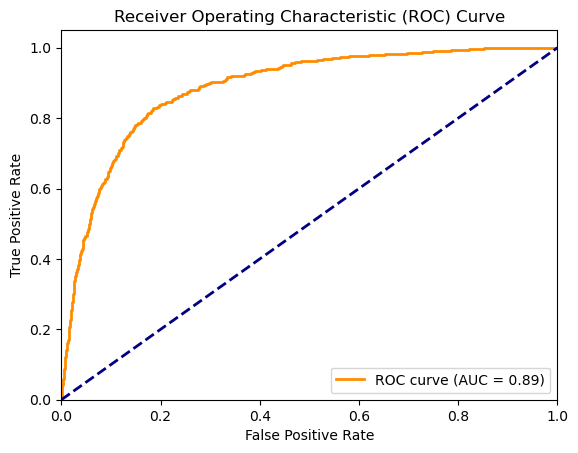

In [127]:
y_svm_scores = svm.decision_function(X_test)
y_svm_probs = (y_svm_scores - y_svm_scores.min()) / (y_svm_scores.max() - y_svm_scores.min())
fpr, tpr, thresholds = roc_curve(y_test, y_svm_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### `Random Forest`

In [103]:
RF = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [104]:
y_RF_pred = RF.predict(X_test)
classification_report_RF_improve = classification_report(y_test, y_RF_pred)
confusion_matrix_RF_improve = confusion_matrix(y_test, y_RF_pred)

Before Improvement: 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      4000
           1       0.49      0.73      0.59       521

    accuracy                           0.88      4521
   macro avg       0.73      0.82      0.76      4521
weighted avg       0.91      0.88      0.89      4521

After Improvement: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      4000
           1       0.96      0.79      0.87       521

    accuracy                           0.97      4521
   macro avg       0.97      0.89      0.93      4521
weighted avg       0.97      0.97      0.97      4521



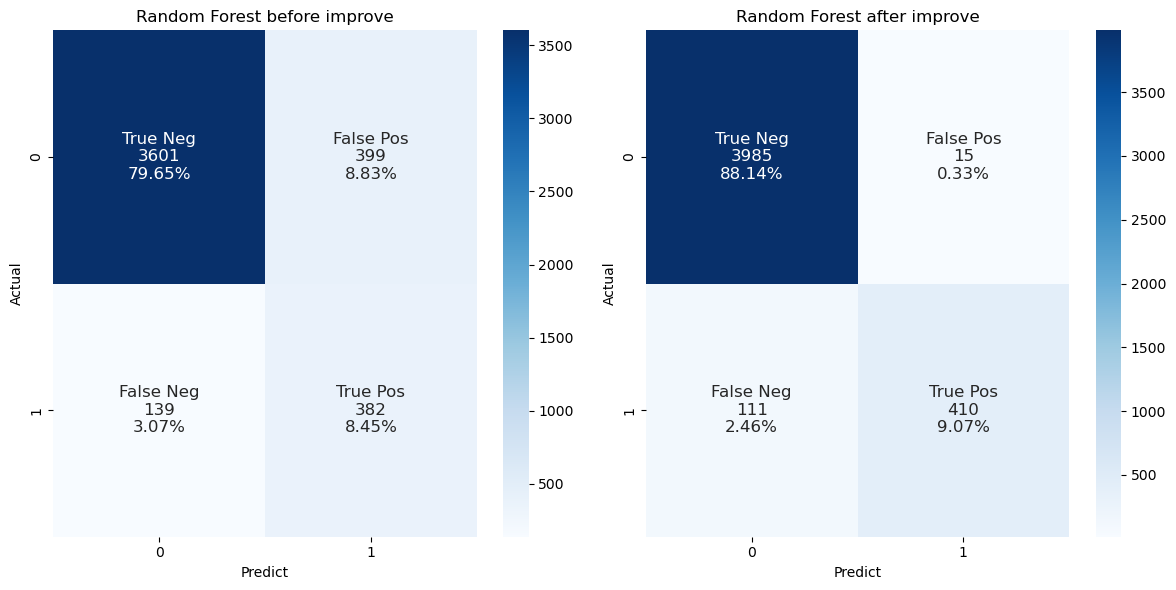

In [105]:
print("Before Improvement: \n", classification_report_RF)
print("After Improvement: \n", classification_report_RF_improve)
make_confusion_matrix_2_models(confusion_matrix_RF, confusion_matrix_RF_improve, "Random Forest before improve", "Random Forest after improve")

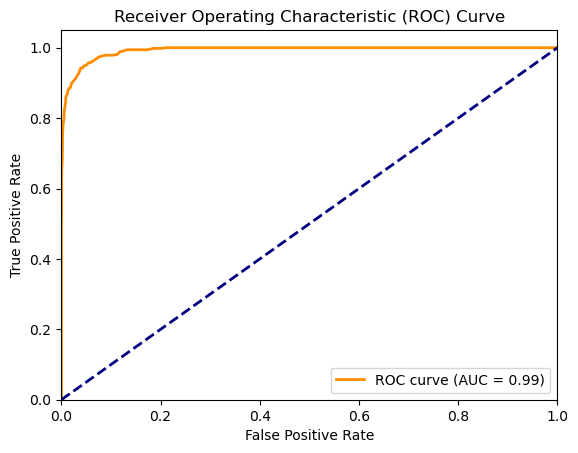

In [122]:
y_RF_probs = RF.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_RF_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Conclusion:** 
+ `StandardScaler` is generally suitable for boundary-based models. StandardScaler is a commonly used technique for feature scaling, which involves transforming the features of a dataset to have zero mean and unit variance. This normalization technique helps in ensuring that the features are on a similar scale, which can be beneficial for boundary-based models.
+ `Boundary-based models`, such as Logistic Regression, Support Vector Machines (SVM), K-Nearest Neighbors (KNN), Decision Tree(DT), and Random Forest(RF), often rely on the distances or similarities between data points to define decision boundaries. If the features have different scales, it can lead to biased or inaccurate boundary estimation. By applying StandardScaler to the data, you can standardize the features and bring them to a common scale, which can improve the performance and stability of these models.

This method may be the best improvement approach for boundary-based models as well as improving accuracy of models

## `Improve Feed Forward Neural Network`

The main benefits of `batch normalization` are:

+ `Improved training speed`: By normalizing the inputs to each layer, batch normalization reduces the internal covariate shift, which is the phenomenon where the distribution of layer inputs changes during training. This allows the network to converge faster and reduces the number of training iterations required.
+ `Increased stability and generalization`: Batch normalization adds some noise to the network during training, which acts as a regularizer and helps prevent overfitting. It also reduces the dependence of the network on the initialization of weights, making it more stable and less sensitive to the choice of initial parameters.
+ `Allows for higher learning rates`: With batch normalization, higher learning rates can be used without causing the network to diverge. This can speed up training even further.

The main advantage of `Leaky ReLU` over `ReLU` is that it addresses the `dying ReLU` problem. In `ReLU`, when the input is negative, the output is zero, and the gradient becomes zero as well. This can cause the neuron to "die" and not update its weights during training, leading to dead neurons in the network. Leaky ReLU introduces a small slope for negative inputs, allowing a small gradient to flow, which helps to alleviate the `dying ReLU` problem.

By using `Leaky ReLU` instead of `ReLU` in my `FFNN (feed-forward neural network)` model, you may potentially see improvements in terms of training performance and generalization. However, it is not guaranteed that `Leaky ReLU` will always outperform `ReLU` in every scenario. Sometimes, `ReLU` can work just as well or even better, depending on the dataset and the specific problem you are trying to solve.

In [115]:
model_ffnn = Sequential([
    Dense(256, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dense(128, kernel_regularizer=regularizers.l1(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dense(128, kernel_regularizer=regularizers.l1(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dense(64, kernel_regularizer=regularizers.l1(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dense(32, kernel_regularizer=regularizers.l1(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dense(16, kernel_regularizer=regularizers.l1(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    Dense(1, activation="sigmoid")
])

In [122]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model_rnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model_rnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
1413/1413 [==============================] - 19s 12ms/step - loss: 0.2476 - accuracy: 0.8955 - val_loss: 0.2456 - val_accuracy: 0.8998
Epoch 2/20
1413/1413 [==============================] - 19s 13ms/step - loss: 0.2359 - accuracy: 0.8999 - val_loss: 0.2512 - val_accuracy: 0.8927
Epoch 3/20
1413/1413 [==============================] - 11s 8ms/step - loss: 0.2363 - accuracy: 0.8992 - val_loss: 0.2280 - val_accuracy: 0.9027
Epoch 4/20
1413/1413 [==============================] - 11s 8ms/step - loss: 0.2274 - accuracy: 0.9015 - val_loss: 0.2306 - val_accuracy: 0.9029
Epoch 5/20
1413/1413 [==============================] - 11s 8ms/step - loss: 0.2418 - accuracy: 0.8983 - val_loss: 0.2289 - val_accuracy: 0.9033
Epoch 6/20
1413/1413 [==============================] - 11s 8ms/step - loss: 0.2236 - accuracy: 0.9043 - val_loss: 0.2235 - val_accuracy: 0.9022
Epoch 7/20
1413/1413 [==============================] - 28s 20ms/step - loss: 0.2219 - accuracy: 0.9039 - val_loss: 0.2275 - val

In [125]:
y_pred = model_ffnn.predict(X_test)
y_pred_classes = np.round(y_pred) 

confusion_matrix_ffnn_improve = confusion_matrix(y_test, y_pred_classes)
classification_report_ffnn_improve = classification_report(y_test, y_pred_classes)

  1/142 [..............................] - ETA: 2s

142/142 [==============================] - 0s 1ms/step


Before Improvement: 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      4000
           1       0.48      0.67      0.56       521

    accuracy                           0.88      4521
   macro avg       0.72      0.79      0.74      4521
weighted avg       0.90      0.88      0.89      4521

After Improvement: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      4000
           1       0.53      0.19      0.28       521

    accuracy                           0.89      4521
   macro avg       0.72      0.58      0.61      4521
weighted avg       0.86      0.89      0.86      4521



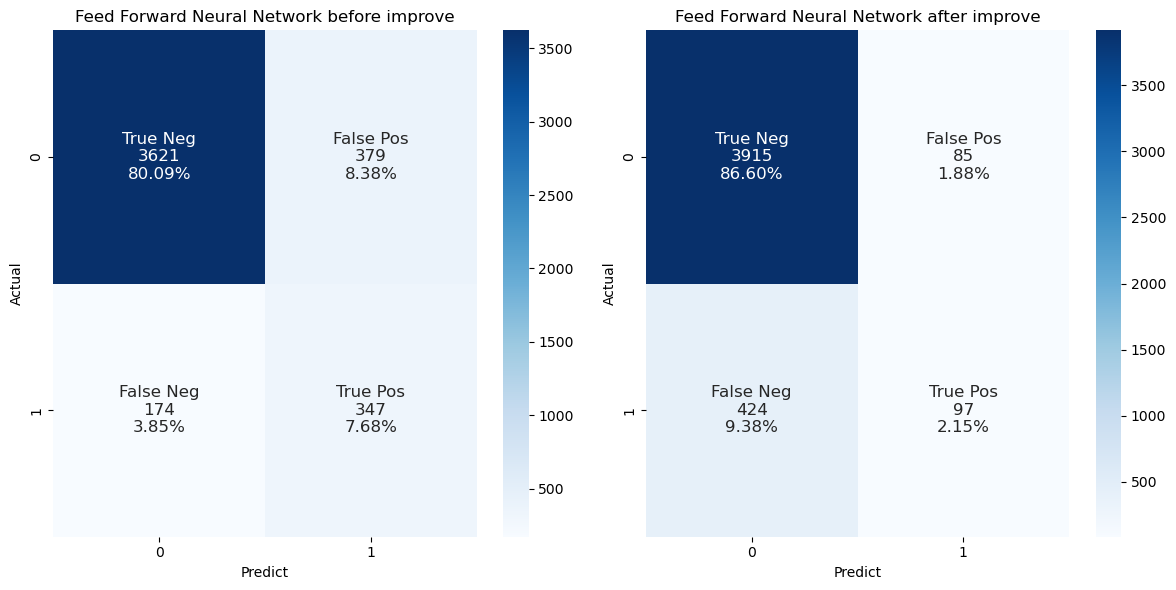

In [126]:
print("Before Improvement: \n", classification_report_ffnn)
print("After Improvement: \n", classification_report_ffnn_improve)
make_confusion_matrix_2_models(confusion_matrix_ffnn, confusion_matrix_ffnn_improve, "Feed Forward Neural Network before improve", "Feed Forward Neural Network after improve")